# Airplane Passenger Satisfaction Analysis
##### Fannia Marvela  

# Background
In the highly competitive aviation industry, every company strives to differentiate itself from its competitors to attract customers. For airlines, customer experience is one of the most important factors that passengers consider when choosing an airline. Therefore, it is essential for an airline to understand passenger needs and improve passenger satisfaction with the services provided, as passenger satisfaction has a significant impact on the company both financially and non-financially.

An airline from the United States wants to analyze passenger satisfaction through a customer satisfaction survey to assess how well the service provided meets passengers' expectations and to identify the factors that influence passenger satisfaction related to their flight experience.

# Problem Statement
The airline from the United States wants to determine the level of passenger satisfaction after a flight and the factors that influence whether passengers are satisfied or dissatisfied with the airline's services. Based on the information gathered, the company can identify the factors that affect passenger satisfaction that need improvement and use this as a basis for future service development to increase customer loyalty.

As a data analyst, the problem statement to be addressed is:
1. Are passengers satisfied or dissatisfied with the airline's service?
2. What factors influence passenger satisfaction related to the airline's service?
3. What can the airline do to improve the services provided?



# Data

The data used is the Airplane Passenger Satisfaction dataset, which contains a survey on passenger satisfaction levels with an airline in the United States. This dataset can be accessed at the following link : https://www.kaggle.com/datasets/teejmahal20/airline-passenger-satisfaction?resource=download




## Import Library

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

Below are the first 5 data entries from the Airplane Passenger Satisfaction dataset:

In [3]:
df=pd.read_csv('airline passanger satisfaction.csv')
df.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


The columns "Unnamed: 0" and "ID" were dropped because they do not provide meaningful information in the dataset and will not be used for further analysis.

In [4]:
df=df.drop(columns=['Unnamed: 0','id'])
df.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


# 1. Data Understanding

The dataset contains information and flight history of passengers, as well as passenger survey results regarding their satisfaction with the airline's services. There are 23 columns in the Airline Passenger Satisfaction dataset, which are as follows:

Passenger Data and Flight History:
* Gender: Passenger's gender (Female, Male)
* Customer Type: Type of customer (Loyal Customer, Disloyal Customer)
* Age: Passenger's age
* Type of Travel: Passenger's type of travel (Personal Travel, Business Travel)
* Class: Passenger's travel class (Business, Eco, Eco Plus)
* Flight Distance: Flight distance

Passenger Satisfaction Rating on Airline Services:
* Inflight Wifi Service: Satisfaction level regarding inflight wifi service
* Departure/Arrival Time Convenient: Satisfaction level regarding departure or arrival time convenience
* Ease of Online Booking: Satisfaction level regarding ease of online booking
* Gate Location: Satisfaction level regarding gate location
* Food and Drink: Satisfaction level regarding food and drink
* Online Boarding: Satisfaction level regarding online boarding
* Seat Comfort: Satisfaction level regarding seat comfort
* Inflight Entertainment: Satisfaction level regarding inflight entertainment
* On-board Service: Satisfaction level regarding on-board service
* Leg Room Service: Satisfaction level regarding legroom space
* Baggage Handling: Satisfaction level regarding baggage handling
* Check-in Service: Satisfaction level regarding check-in service
* Inflight Service: Satisfaction level regarding inflight service
* Cleanliness: Satisfaction level regarding cleanliness
* Departure Delay in Minutes: Departure delay time in minutes
* Arrival Delay in Minutes: Arrival delay time in minutes
* Satisfaction: Overall airline satisfaction level (Satisfaction, Neutral, or Dissatisfaction)






In [5]:
df.shape

(103904, 23)

In [6]:
df.describe()

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103594.000000
mean,39.379706,1189.448375,2.729683,3.060296,2.756901,2.976883,3.202129,3.250375,3.439396,3.358158,3.382363,3.351055,3.631833,3.304290,3.640428,3.286351,14.815618,15.178678
std,15.114964,997.147281,1.327829,1.525075,1.398929,1.277621,1.329533,1.349509,1.319088,1.332991,1.288354,1.315605,1.180903,1.265396,1.175663,1.312273,38.230901,38.698682
min,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,40.000000,843.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,51.000000,1743.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


In [7]:
df.describe(include='object')

,Gender,Customer Type,Type of Travel,Class,satisfaction
count,103904,103904,103904,103904,103904
unique,2,2,2,3,2
top,Female,Loyal Customer,Business travel,Business,neutral or dissatisfied
freq,52727,84923,71655,49665,58879


In [8]:
pd.set_option('display.max_colwidth', None)

listItem = []
for col in df.columns :
    listItem.append( [col, df[col].nunique(), df[col].unique()])

tabeldesc = pd.DataFrame(columns=['Column Name', 'Number of Unique', 'Unique Sample'],
                     data=listItem)
tabeldesc

,Column Name,Number of Unique,Unique Sample
0,Gender,2,"[Male, Female]"
1,Customer Type,2,"[Loyal Customer, disloyal Customer]"
2,Age,75,"[13, 25, 26, 61, 47, 52, 41, 20, 24, 12, 53, 33, 45, 38, 9, 17, 43, 58, 23, 57, 49, 36, 22, 31, 15, 35, 67, 37, 40, 34, 39, 50, 29, 54, 21, 28, 27, 69, 60, 48, 59, 46, 30, 66, 64, 44, 51, 32, 19, 42, 16, 11, 62, 8, 56, 68, 55, 18, 65, 72, 70, 63, 10, 7, 14, 80, 74, 71, 85, 73, 76, 77, 75, 79, 78]"
3,Type of Travel,2,"[Personal Travel, Business travel]"
4,Class,3,"[Eco Plus, Business, Eco]"
5,Flight Distance,3802,"[460, 235, 1142, 562, 214, 1180, 1276, 2035, 853, 1061, 1182, 308, 834, 946, 453, 486, 2123, 2075, 2486, 1174, 208, 752, 2139, 452, 719, 1561, 315, 3347, 2342, 819, 1043, 2611, 1192, 349, 883, 550, 302, 354, 1734, 1452, 296, 2882, 529, 1522, 612, 1454, 731, 2076, 309, 775, 861, 3334, 2496, 602, 446, 216, 3475, 646, 2501, 2227, 1426, 190, 1532, 157, 1506, 205, 895, 516, 909, 1435, 1190, 1259, 1670, 3960, 817, 406, 404, 500, 689, 3100, 525, 931, 304, 1896, 261, 347, 1042, 1773, 342, 297, 332, 2388, 748, 1080, 231, 551, 972, 265, 488, 1144, ...]"
6,Inflight wifi service,6,"[3, 2, 4, 1, 5, 0]"
7,Departure/Arrival time convenient,6,"[4, 2, 5, 3, 1, 0]"
8,Ease of Online booking,6,"[3, 2, 5, 4, 1, 0]"
9,Gate location,6,"[1, 3, 2, 5, 4, 0]"


In general, it can be observed that:
* The dataset contains 103,904 entries and 23 features.
* There is missing data in the "Arrival Delay in Minutes" column, represented by "nan".
* There are no anomalies in the dataset as, based on domain knowledge, the data in the dataset appears reasonable.
* Tidak terdapat anomali pada dataset karena berdasarkan domain knowledge, data pada dataset masih masuk akal.


# 2. Data Cleaning
Before analyzing the data, we need to perform data cleaning to address any errors and inconsistencies that may arise, ensuring that the cleaned data is of high quality and can be used in the subsequent analysis process.

## 2.1 Data Formatting

In [5]:
df.loc[df['Customer Type']=='disloyal Customer','Customer Type']='Disloyal Customer'
df.loc[df['Type of Travel']=='Business travel','Type of Travel']='Business Travel'
df.loc[df['satisfaction']=='neutral or dissatisfied','satisfaction']='Neutral or Dissatisfied'
df.loc[df['satisfaction']=='satisfied','satisfaction']='Satisfied'


We performed format changes as follows:
* Disloyal customer in the Customer Type column was changed to Disloyal Customer
* Business travel in the Type of Travel column was changed to Business Travel
* neutral or dissatisfied in the satisfaction column was changed to Neutral or Dissatisfied
* satisfied in the satisfaction column was changed to Satisfied  
These format changes were made to standardize the writing format across columns and avoid writing errors.

## 2.2 Check Duplicate

In [10]:
duplicates_count = int(df.duplicated().sum())
print(duplicates_count)

0


There is no duplicate data in the dataset, so no data needs to be dropped.

## 2.3 Handling 0 Value in Survey Data

In [11]:
print(f'''
Percentage of survey results that have a value of 0 in the column Inflight Wifi Service: {len(df[df['Inflight wifi service'] == 0])/df['Inflight wifi service'].value_counts().sum()*100}
Percentage of survey results that have a value of 0 in the column Departure/Arrival Time Convenient: {len(df[df['Departure/Arrival time convenient'] == 0])/df['Departure/Arrival time convenient'].value_counts().sum()*100}
Percentage of survey results that have a value of 0 in the column Ease of Online Booking: {len(df[df['Ease of Online booking'] == 0])/df['Ease of Online booking'].value_counts().sum()*100}
Percentage of survey results that have a value of 0 in the column Gate Location: {len(df[df['Gate location'] == 0])/df['Gate location'].value_counts().sum()*100}
Percentage of survey results that have a value of 0 in the column Food and Drink: {len(df[df['Food and drink'] == 0])/df['Food and drink'].value_counts().sum()*100}
Percentage of survey results that have a value of 0 in the column Inflight Online Boarding: {len(df[df['Online boarding'] == 0])/df['Online boarding'].value_counts().sum()*100}
Percentage of survey results that have a value of 0 in the column Inflight Seat Comfort: {len(df[df['Seat comfort'] == 0])/df['Seat comfort'].value_counts().sum()*100}
Percentage of survey results that have a value of 0 in the column Inflight Entertainment: {len(df[df['Inflight entertainment'] == 0])/df['Inflight entertainment'].value_counts().sum()*100}
Percentage of survey results that have a value of 0 in the column On-board Service: {len(df[df['On-board service'] == 0])/df['On-board service'].value_counts().sum()*100}
Percentage of survey results that have a value of 0 in the column Leg Room Service: {len(df[df['Leg room service'] == 0])/df['Leg room service'].value_counts().sum()*100}
Percentage of survey results that have a value of 0 in the column Baggage Handling: {len(df[df['Baggage handling'] == 0])/df['Baggage handling'].value_counts().sum()*100}
Percentage of survey results that have a value of 0 in the column Checkin service: {len(df[df['Checkin service'] == 0])/df['Checkin service'].value_counts().sum()*100}
Percentage of survey results that have a value of 0 in the column Inflight service: {len(df[df['Inflight service'] == 0])/df['Inflight service'].value_counts().sum()*100}
Percentage of survey results that have a value of 0 in the column Cleanliness: {len(df[df['Cleanliness'] == 0])/df['Cleanliness'].value_counts().sum()*100}

''')


Percentage of survey results that have a value of 0 in the column Inflight Wifi Service: 2.9864105327995074
Percentage of survey results that have a value of 0 in the column Departure/Arrival Time Convenient: 5.100862334462581
Percentage of survey results that have a value of 0 in the column Ease of Online Booking: 4.318409300893132
Percentage of survey results that have a value of 0 in the column Gate Location: 0.0009624268555589776
Percentage of survey results that have a value of 0 in the column Food and Drink: 0.1029796735448106
Percentage of survey results that have a value of 0 in the column Inflight Online Boarding: 2.3367724052971974
Percentage of survey results that have a value of 0 in the column Inflight Seat Comfort: 0.0009624268555589776
Percentage of survey results that have a value of 0 in the column Inflight Entertainment: 0.013473975977825684
Percentage of survey results that have a value of 0 in the column On-board Service: 0.0028872805666769327
Percentage of survey 

Survey results with a value of 0 can affect the data analysis process because they do not provide any useful information about customer satisfaction with the airline's service. However, it can be seen that the percentage of survey results with a value of 0 in each column of passenger satisfaction ratings is relatively small. The highest percentage of survey results with a value of 0 is found in the "Departure/Arrival Time Convenient" column, with only 5.1%. Other columns have a percentage below that.

Therefore, survey results with a value of 0 in all columns related to passenger satisfaction ratings will not be dropped.

## 2.4 Handling Missing Value

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Gender                             103904 non-null  object 
 1   Customer Type                      103904 non-null  object 
 2   Age                                103904 non-null  int64  
 3   Type of Travel                     103904 non-null  object 
 4   Class                              103904 non-null  object 
 5   Flight Distance                    103904 non-null  int64  
 6   Inflight wifi service              103904 non-null  int64  
 7   Departure/Arrival time convenient  103904 non-null  int64  
 8   Ease of Online booking             103904 non-null  int64  
 9   Gate location                      103904 non-null  int64  
 10  Food and drink                     103904 non-null  int64  
 11  Online boarding                    1039

Each data type corresponds appropriately to its respective feature. The dataset contains 23 features, where:
* 5 features are nominal data: Gender, Customer Type, Type of Travel, Class, and Satisfaction.
* 4 features are continuous data: Age, Flight Distance, Departure Delay in Minutes, and Arrival Delay in Minutes.
* 14 features are ordinal data, representing passenger satisfaction survey results with a scale of 1-5 (1: Very Dissatisfied, 5: Very Satisfied): Inflight Wifi Service, Departure/Arrival Time Convenient, Ease of Online Booking, Gate Location, Food and Drink, Online Boarding, Seat Comfort, Inflight Entertainment, On-board Service, Leg Room Service, Baggage Handling, Check-in Service, Inflight Service, Cleanliness.




In [13]:
# Number of missing data
df.isna().sum()

Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction                           0
dtype: int64

In [14]:
# Percentage of missing data
df.isna().sum()/len(df)*100

Gender                               0.000000
Customer Type                        0.000000
Age                                  0.000000
Type of Travel                       0.000000
Class                                0.000000
Flight Distance                      0.000000
Inflight wifi service                0.000000
Departure/Arrival time convenient    0.000000
Ease of Online booking               0.000000
Gate location                        0.000000
Food and drink                       0.000000
Online boarding                      0.000000
Seat comfort                         0.000000
Inflight entertainment               0.000000
On-board service                     0.000000
Leg room service                     0.000000
Baggage handling                     0.000000
Checkin service                      0.000000
Inflight service                     0.000000
Cleanliness                          0.000000
Departure Delay in Minutes           0.000000
Arrival Delay in Minutes          

<Axes: >

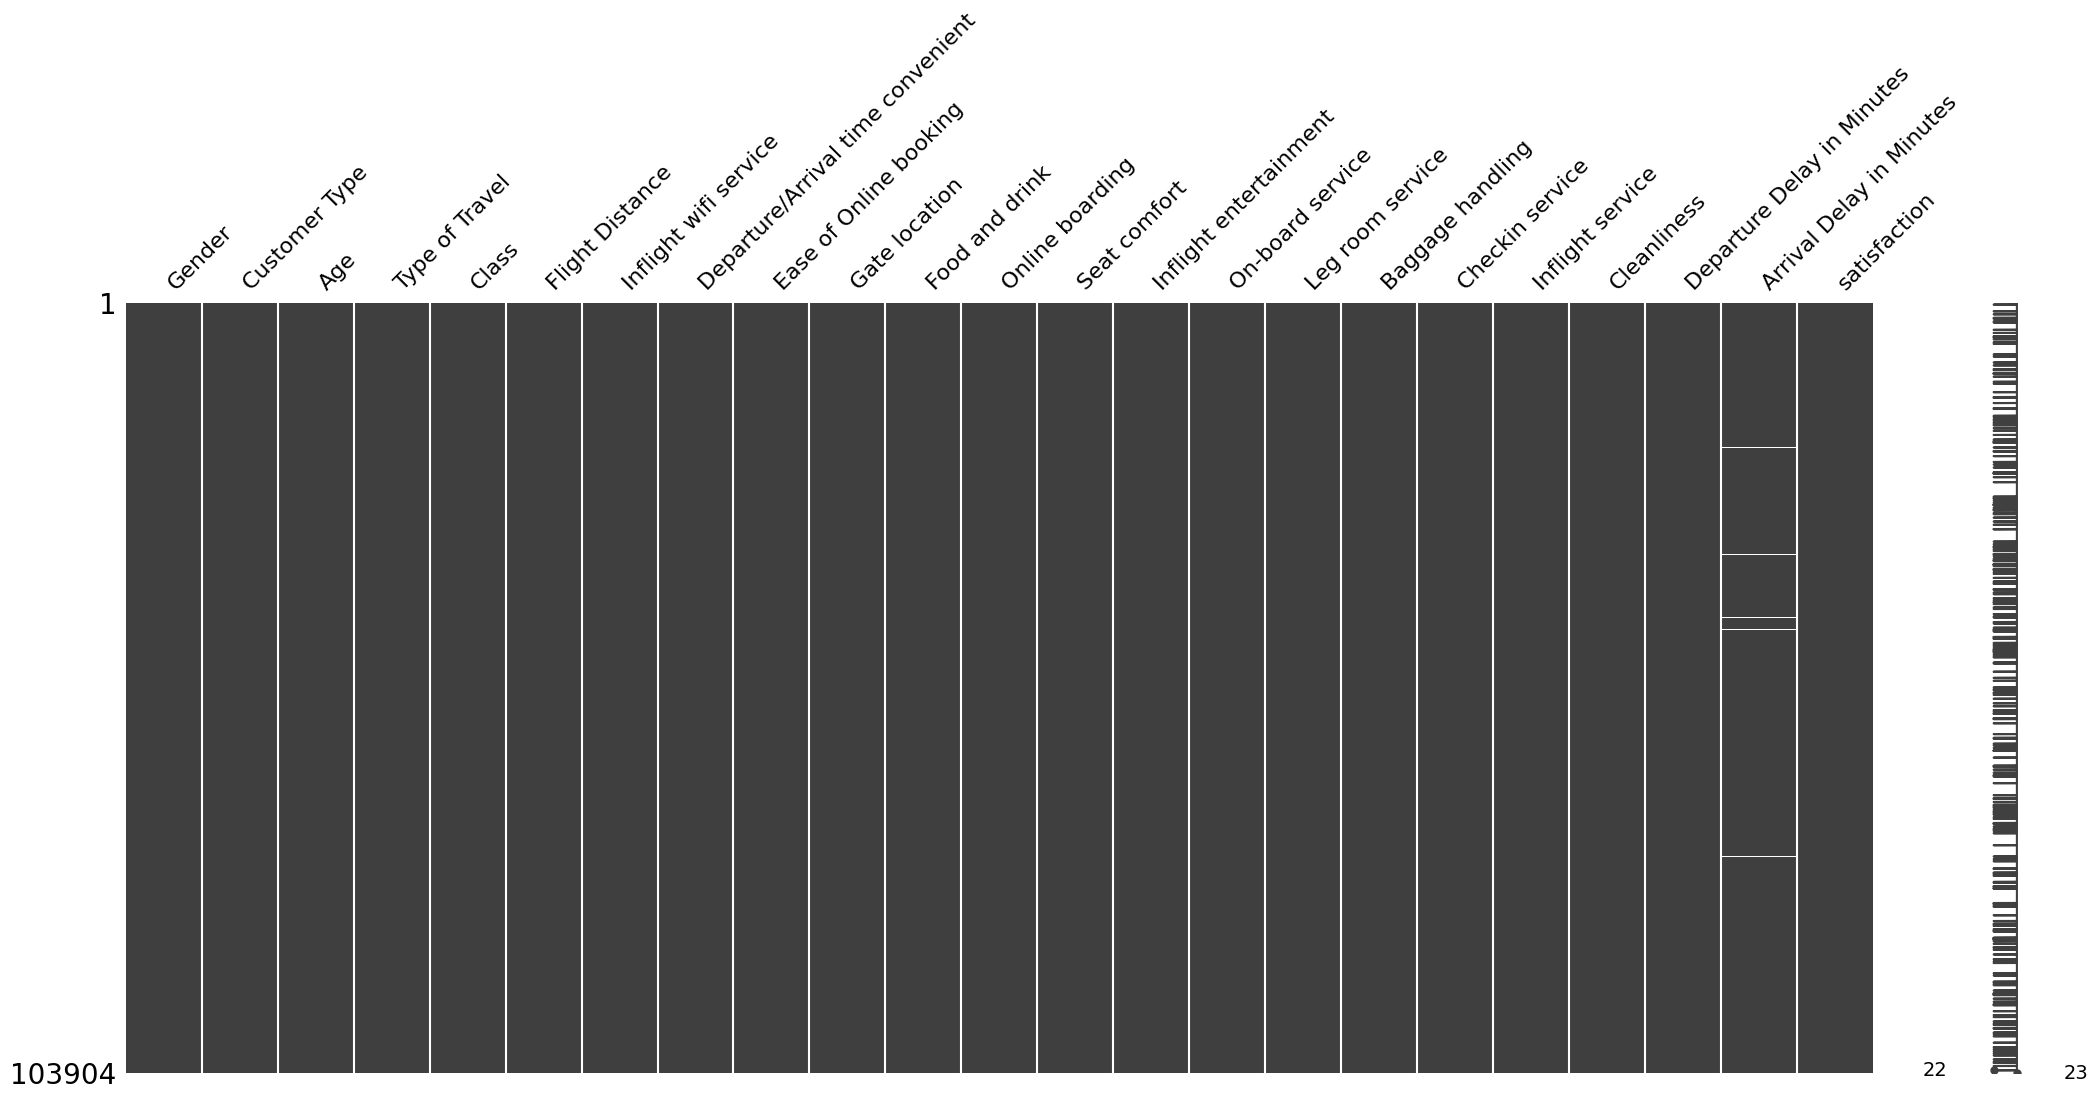

In [15]:
# Visualization of missing data
msno.matrix(df)

There are 310 missing values in the "Arrival Delay in Minutes" column, representing 0.3%. Based on the visualization of the missing data distribution, no specific pattern or correlation with other features is observed.

Therefore, further analysis will be conducted to determine the appropriate handling for the missing data (whether to remove rows/columns containing missing values or to fill the missing data with values as close as possible to the original ones).

In [6]:
# Data with missing values in the "Arrival Delay in Minutes" column
arrivaldelay_nan=df.loc[df['Arrival Delay in Minutes'].isna()==True] 
arrivaldelay_nan

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
213,Female,Loyal Customer,38,Business Travel,Eco,109,5,3,3,3,...,5,5,2,4,1,1,5,31,NaN,Satisfied
1124,Male,Loyal Customer,53,Personal Travel,Eco,1012,3,2,3,4,...,4,4,4,4,3,3,4,38,NaN,Neutral or Dissatisfied
1529,Male,Loyal Customer,39,Business Travel,Business,733,2,5,5,5,...,2,2,2,2,2,2,3,11,NaN,Neutral or Dissatisfied
2004,Female,Disloyal Customer,26,Business Travel,Business,1035,3,3,3,1,...,2,3,3,4,5,5,2,41,NaN,Neutral or Dissatisfied
2108,Female,Loyal Customer,24,Personal Travel,Eco,417,2,1,2,2,...,5,1,4,2,1,2,5,1,NaN,Neutral or Dissatisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102067,Male,Loyal Customer,49,Personal Travel,Eco Plus,1249,2,5,2,3,...,3,4,5,4,3,4,3,230,NaN,Neutral or Dissatisfied
102384,Male,Loyal Customer,58,Business Travel,Eco,733,3,3,3,3,...,3,3,1,2,4,2,3,55,NaN,Neutral or Dissatisfied
102552,Female,Disloyal Customer,29,Business Travel,Eco,1107,2,1,1,1,...,5,4,1,5,5,3,5,0,NaN,Neutral or Dissatisfied
102960,Male,Loyal Customer,58,Business Travel,Eco,1088,4,4,1,1,...,5,1,5,5,5,3,5,0,NaN,Satisfied


In [7]:
# Indexes of data with missing values in the "Arrival Delay in Minutes" column
index_nan=df.loc[df['Arrival Delay in Minutes'].isna()==True].index 
index_nan

Index([   213,   1124,   1529,   2004,   2108,   2485,   2630,   3621,   4041,
         4490,
       ...
       100426, 100682, 100962, 101242, 101532, 102067, 102384, 102552, 102960,
       103540],
      dtype='int64', length=310)

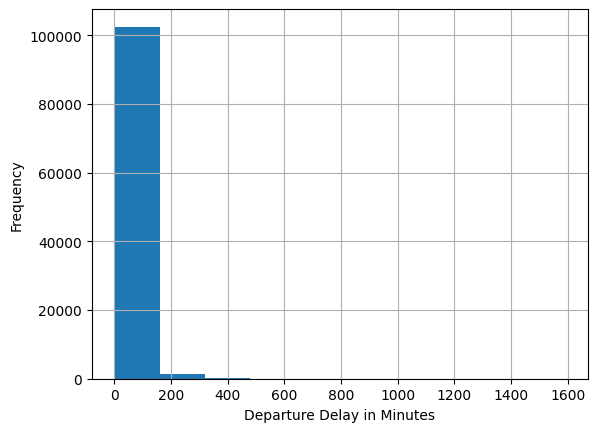

In [18]:
df['Departure Delay in Minutes'].hist()
plt.xlabel('Departure Delay in Minutes')
plt.ylabel('Frequency')
plt.style.use('default')
plt.show()
# Skewed to the right

In [20]:
# D'Agustino and Pearson
from scipy.stats import normaltest
stat, p_value=normaltest(df['Departure Delay in Minutes'])
print(f"Statistic: {stat}, P-value: {p_value}")

Statistic: 131445.97600987297, P-value: 0.0


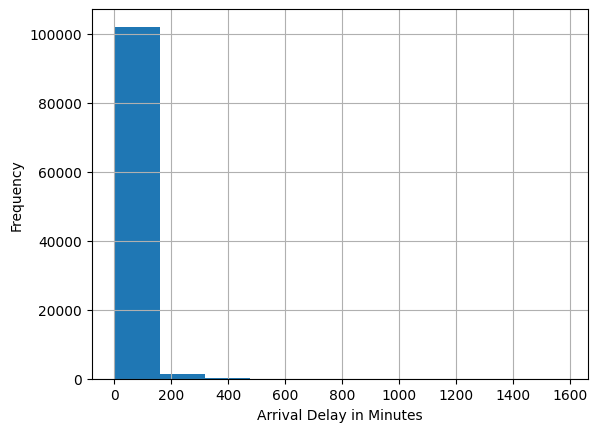

In [21]:
df['Arrival Delay in Minutes'].hist()
plt.xlabel('Arrival Delay in Minutes')
plt.ylabel('Frequency')
plt.show()
# Skewed to the right

In [23]:
# D'Agustino and Pearson
from scipy.stats import normaltest
stat,p_value=normaltest(df['Arrival Delay in Minutes'].dropna())
print(f"Statistic: {stat}, P-value: {p_value}")

Statistic: 129251.47199614844, P-value: 0.0


Based on the histogram of the "Departure Delay in Minutes" column, the data distribution appears to be skewed to the right. Additionally, through the normality test, since the p-value < alpha = 0.05, we have sufficient evidence to reject the null hypothesis (H0), meaning the data does not follow a normal distribution.

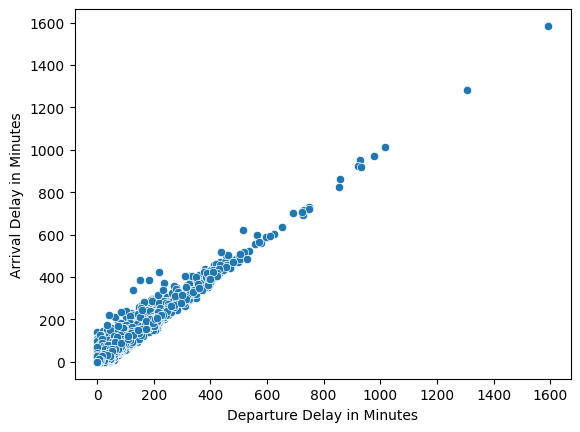

In [25]:
sns.scatterplot(data=df,x='Departure Delay in Minutes',y='Arrival Delay in Minutes')

plt.show()

In [26]:
correlation = df['Departure Delay in Minutes'].corr(df['Arrival Delay in Minutes'], method='spearman')
print(float(correlation))


0.7408426238339384


* The scatterplot between "Departure Delay in Minutes" and "Arrival Delay in Minutes" shows a positive, monotonically increasing, and linear relationship.
* The correlation value between "Departure Delay in Minutes" and "Arrival Delay in Minutes" is 0.741, which indicates that the relationship between departure delay in minutes and arrival delay in minutes is directly proportional. In other words, the longer the departure delay, the longer the arrival delay will be as well. The absolute value of 0.741 suggests that the strength of the correlation between the two variables is strong.

Therefore, for filling the missing data in the "Arrival Delay in Minutes" column, we will use the median of "Arrival Delay in Minutes" based on the "Departure Delay in Minutes," as there is a strong relationship between the departure delay and the arrival delay. Additionally, we are using the median to provide a better representation of the central tendency of the data, especially since the data is not normally distributed and is less sensitive to outliers.

Now, we will check the median of "Arrival Delay in Minutes" based on the "Departure Delay in Minutes."

In [27]:
result = df.groupby('Departure Delay in Minutes')['Arrival Delay in Minutes'].median()
print(result)

Departure Delay in Minutes
0          0.0
1          0.0
2          0.0
3          0.0
4          0.0
         ...  
933      920.0
978      970.0
1017    1011.0
1305    1280.0
1592    1584.0
Name: Arrival Delay in Minutes, Length: 446, dtype: float64


Now, we will fill the missing data in the "Arrival Delay in Minutes" column with the mean "Arrival Delay in Minutes" based on the "Departure Delay in Minutes."

In [8]:
# Fill missing values in 'Arrival Delay in Minutes' with the median of each 'Departure Delay in Minutes' group
df['Arrival Delay in Minutes'] = df.groupby('Departure Delay in Minutes')['Arrival Delay in Minutes'].transform(lambda x: x.fillna(x.median()))

/Users/fanniamarvela/Library/Python/3.9/lib/python/site-packages/numpy/lib/_nanfunctions_impl.py:1231: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


In [29]:
df.loc[index_nan][['Departure Delay in Minutes','Arrival Delay in Minutes']]

,Departure Delay in Minutes,Arrival Delay in Minutes
213,31,26.0
1124,38,33.0
1529,11,5.0
2004,41,36.0
2108,1,0.0
...,...,...
102067,230,228.0
102384,55,49.0
102552,0,0.0
102960,0,0.0


In [30]:
# The number of missing data
df.isna().sum()

Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             1
satisfaction                         0
dtype: int64

It appears that there is still 1 missing data in the "Arrival Delay in Minutes" column after the imputation. Therefore, further investigation will be conducted regarding the remaining missing data.

In [31]:
df.loc[df['Arrival Delay in Minutes'].isna()==True]

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
71557,Male,Loyal Customer,50,Business Travel,Business,95,1,3,3,3,...,4,3,4,4,3,2,3,455,NaN,Neutral or Dissatisfied


It appears that there is still missing data in the "Arrival Delay in Minutes" column for the row with index 71557. The data in the "Arrival Delay in Minutes" column remains NaN because no other rows have a "Departure Delay in Minutes" value of 455 minutes, making it impossible to impute the missing value using the mean "Arrival Delay in Minutes" based on "Departure Delay in Minutes." Therefore, for this specific row, we will set the value in the "Arrival Delay in Minutes" column to be the same as the value in the "Departure Delay in Minutes" column.

In [9]:
df['Arrival Delay in Minutes']=df['Arrival Delay in Minutes'].fillna(455)

In [10]:
# The number of missing data
df.isna().sum()

Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
satisfaction                         0
dtype: int64

Now there is no more missing data.

## 2.5 Handling Outlier

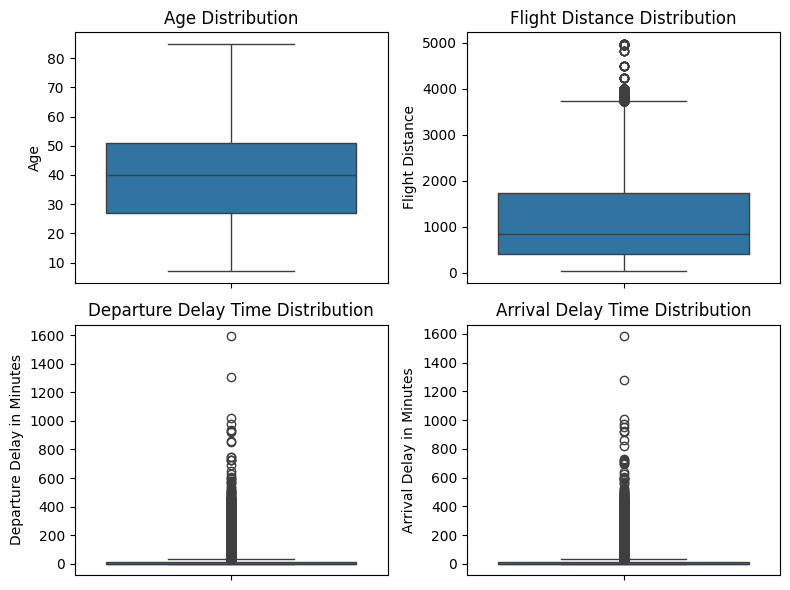

In [34]:
figure,axis=plt.subplots(2,2,figsize=(8,6))

sns.boxplot(data=df['Age'],ax=axis[0,0]).set_title('Age Distribution')
sns.boxplot(data=df['Flight Distance'],ax=axis[0,1]).set_title('Flight Distance Distribution')
sns.boxplot(data=df['Departure Delay in Minutes'],ax=axis[1,0]).set_title('Departure Delay Time Distribution')
sns.boxplot(data=df['Arrival Delay in Minutes'],ax=axis[1,1]).set_title('Arrival Delay Time Distribution')

plt.tight_layout()
plt.show()

Although there are outliers in the columns for flight distance, departure delay, and arrival delay, we will not drop the outliers because they are not caused by incorrect data entry or measurement errors. According to domain knowledge, the existing outliers represent normal data variations that can occur, such as very long flight distances on specific flights and extended departure or arrival delays on certain flights.

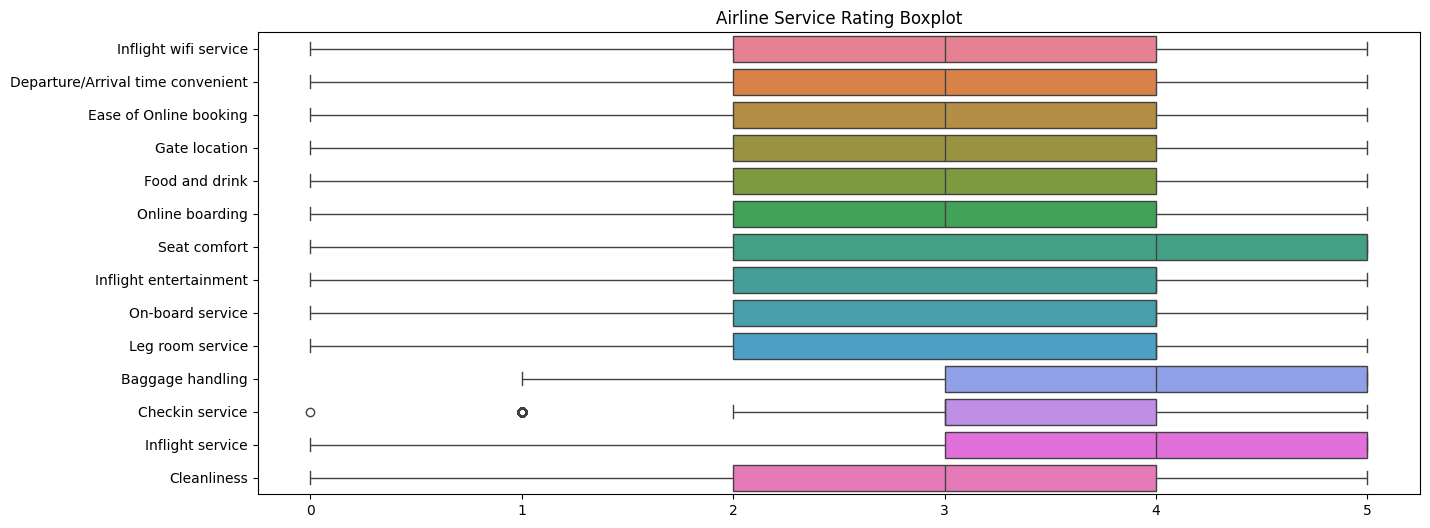

In [35]:
plt.subplots(figsize=(15,6))
sns.boxplot(data=df[['Inflight wifi service','Departure/Arrival time convenient','Ease of Online booking','Gate location','Food and drink','Online boarding','Seat comfort','Inflight entertainment','On-board service','Leg room service','Baggage handling','Checkin service','Inflight service','Cleanliness']], orient='h').set_title('Airline Service Rating Boxplot')

plt.show()

Additionally, although there are outliers in the "Check-in Service" column, we cannot classify passengers who rate the service as 1 as outliers. This is because outliers do not truly exist in a Likert scale, and the outliers present represent variations in passenger survey responses. Therefore, we will not drop the outliers in the "Check-in Service" column either.

## 2.6 Cleaned Data
After completing the data cleaning process, here is the information from the cleaned data:

In [36]:
listItem = []
for col in df.columns :
    listItem.append([col, df[col].dtype, df[col].isna().sum(),
                    df[col].nunique(), df[col].unique()]);

dfDesc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'unique', 'uniqueSample'],
                     data=listItem)
print(df.shape)
dfDesc

(103904, 23)


,dataFeatures,dataType,null,unique,uniqueSample
0,Gender,object,0,2,"[Male, Female]"
1,Customer Type,object,0,2,"[Loyal Customer, Disloyal Customer]"
2,Age,int64,0,75,"[13, 25, 26, 61, 47, 52, 41, 20, 24, 12, 53, 33, 45, 38, 9, 17, 43, 58, 23, 57, 49, 36, 22, 31, 15, 35, 67, 37, 40, 34, 39, 50, 29, 54, 21, 28, 27, 69, 60, 48, 59, 46, 30, 66, 64, 44, 51, 32, 19, 42, 16, 11, 62, 8, 56, 68, 55, 18, 65, 72, 70, 63, 10, 7, 14, 80, 74, 71, 85, 73, 76, 77, 75, 79, 78]"
3,Type of Travel,object,0,2,"[Personal Travel, Business Travel]"
4,Class,object,0,3,"[Eco Plus, Business, Eco]"
5,Flight Distance,int64,0,3802,"[460, 235, 1142, 562, 214, 1180, 1276, 2035, 853, 1061, 1182, 308, 834, 946, 453, 486, 2123, 2075, 2486, 1174, 208, 752, 2139, 452, 719, 1561, 315, 3347, 2342, 819, 1043, 2611, 1192, 349, 883, 550, 302, 354, 1734, 1452, 296, 2882, 529, 1522, 612, 1454, 731, 2076, 309, 775, 861, 3334, 2496, 602, 446, 216, 3475, 646, 2501, 2227, 1426, 190, 1532, 157, 1506, 205, 895, 516, 909, 1435, 1190, 1259, 1670, 3960, 817, 406, 404, 500, 689, 3100, 525, 931, 304, 1896, 261, 347, 1042, 1773, 342, 297, 332, 2388, 748, 1080, 231, 551, 972, 265, 488, 1144, ...]"
6,Inflight wifi service,int64,0,6,"[3, 2, 4, 1, 5, 0]"
7,Departure/Arrival time convenient,int64,0,6,"[4, 2, 5, 3, 1, 0]"
8,Ease of Online booking,int64,0,6,"[3, 2, 5, 4, 1, 0]"
9,Gate location,int64,0,6,"[1, 3, 2, 5, 4, 0]"


After the data cleaning process, the number of rows remains the same as before, with 103.904 rows, because no data was deleted and the missing values have been filled with relevant data. Therefore, the cleaned data is now ready for further analysis.

# 3. Statistics Summary

In [11]:
df.describe()

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000
mean,39.379706,1189.448375,2.729683,3.060296,2.756901,2.976883,3.202129,3.250375,3.439396,3.358158,3.382363,3.351055,3.631833,3.304290,3.640428,3.286351,14.815618,15.236820
std,15.114964,997.147281,1.327829,1.525075,1.398929,1.277621,1.329533,1.349509,1.319088,1.332991,1.288354,1.315605,1.180903,1.265396,1.175663,1.312273,38.230901,38.800995
min,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,40.000000,843.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,51.000000,1743.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


In [38]:
df.describe(include='object')

,Gender,Customer Type,Type of Travel,Class,satisfaction
count,103904,103904,103904,103904,103904
unique,2,2,2,3,2
top,Female,Loyal Customer,Business Travel,Business,Neutral or Dissatisfied
freq,52727,84923,71655,49665,58879


In general, the information obtained from the cleaned data is as follows:
* There are 103,904 records and 23 features in the dataset.
* The average flight distance is 1,189 km with a large standard deviation of 997 km, indicating that the airline operates both short-haul and long-haul flights.
* The average departure and arrival delays are both around 15 minutes with a standard deviation of about 38 minutes.
* The median departure and arrival delay is 0, meaning 50% of the flights have no delays.
* The proportion of male and female passengers is relatively similar, with 51% of passengers being female and the rest male.
* The majority of passengers, 82%, are loyal customers, meaning they have been using the airline for a long time. Additionally, 69% of passengers choose the airline for business travel.
* Overall, 57% of passengers feel neutral or dissatisfied with the airline's service.

# 3.1 Data Distribution

Before proceeding with further analysis, we need to examine the distribution of the data to better understand its characteristics.

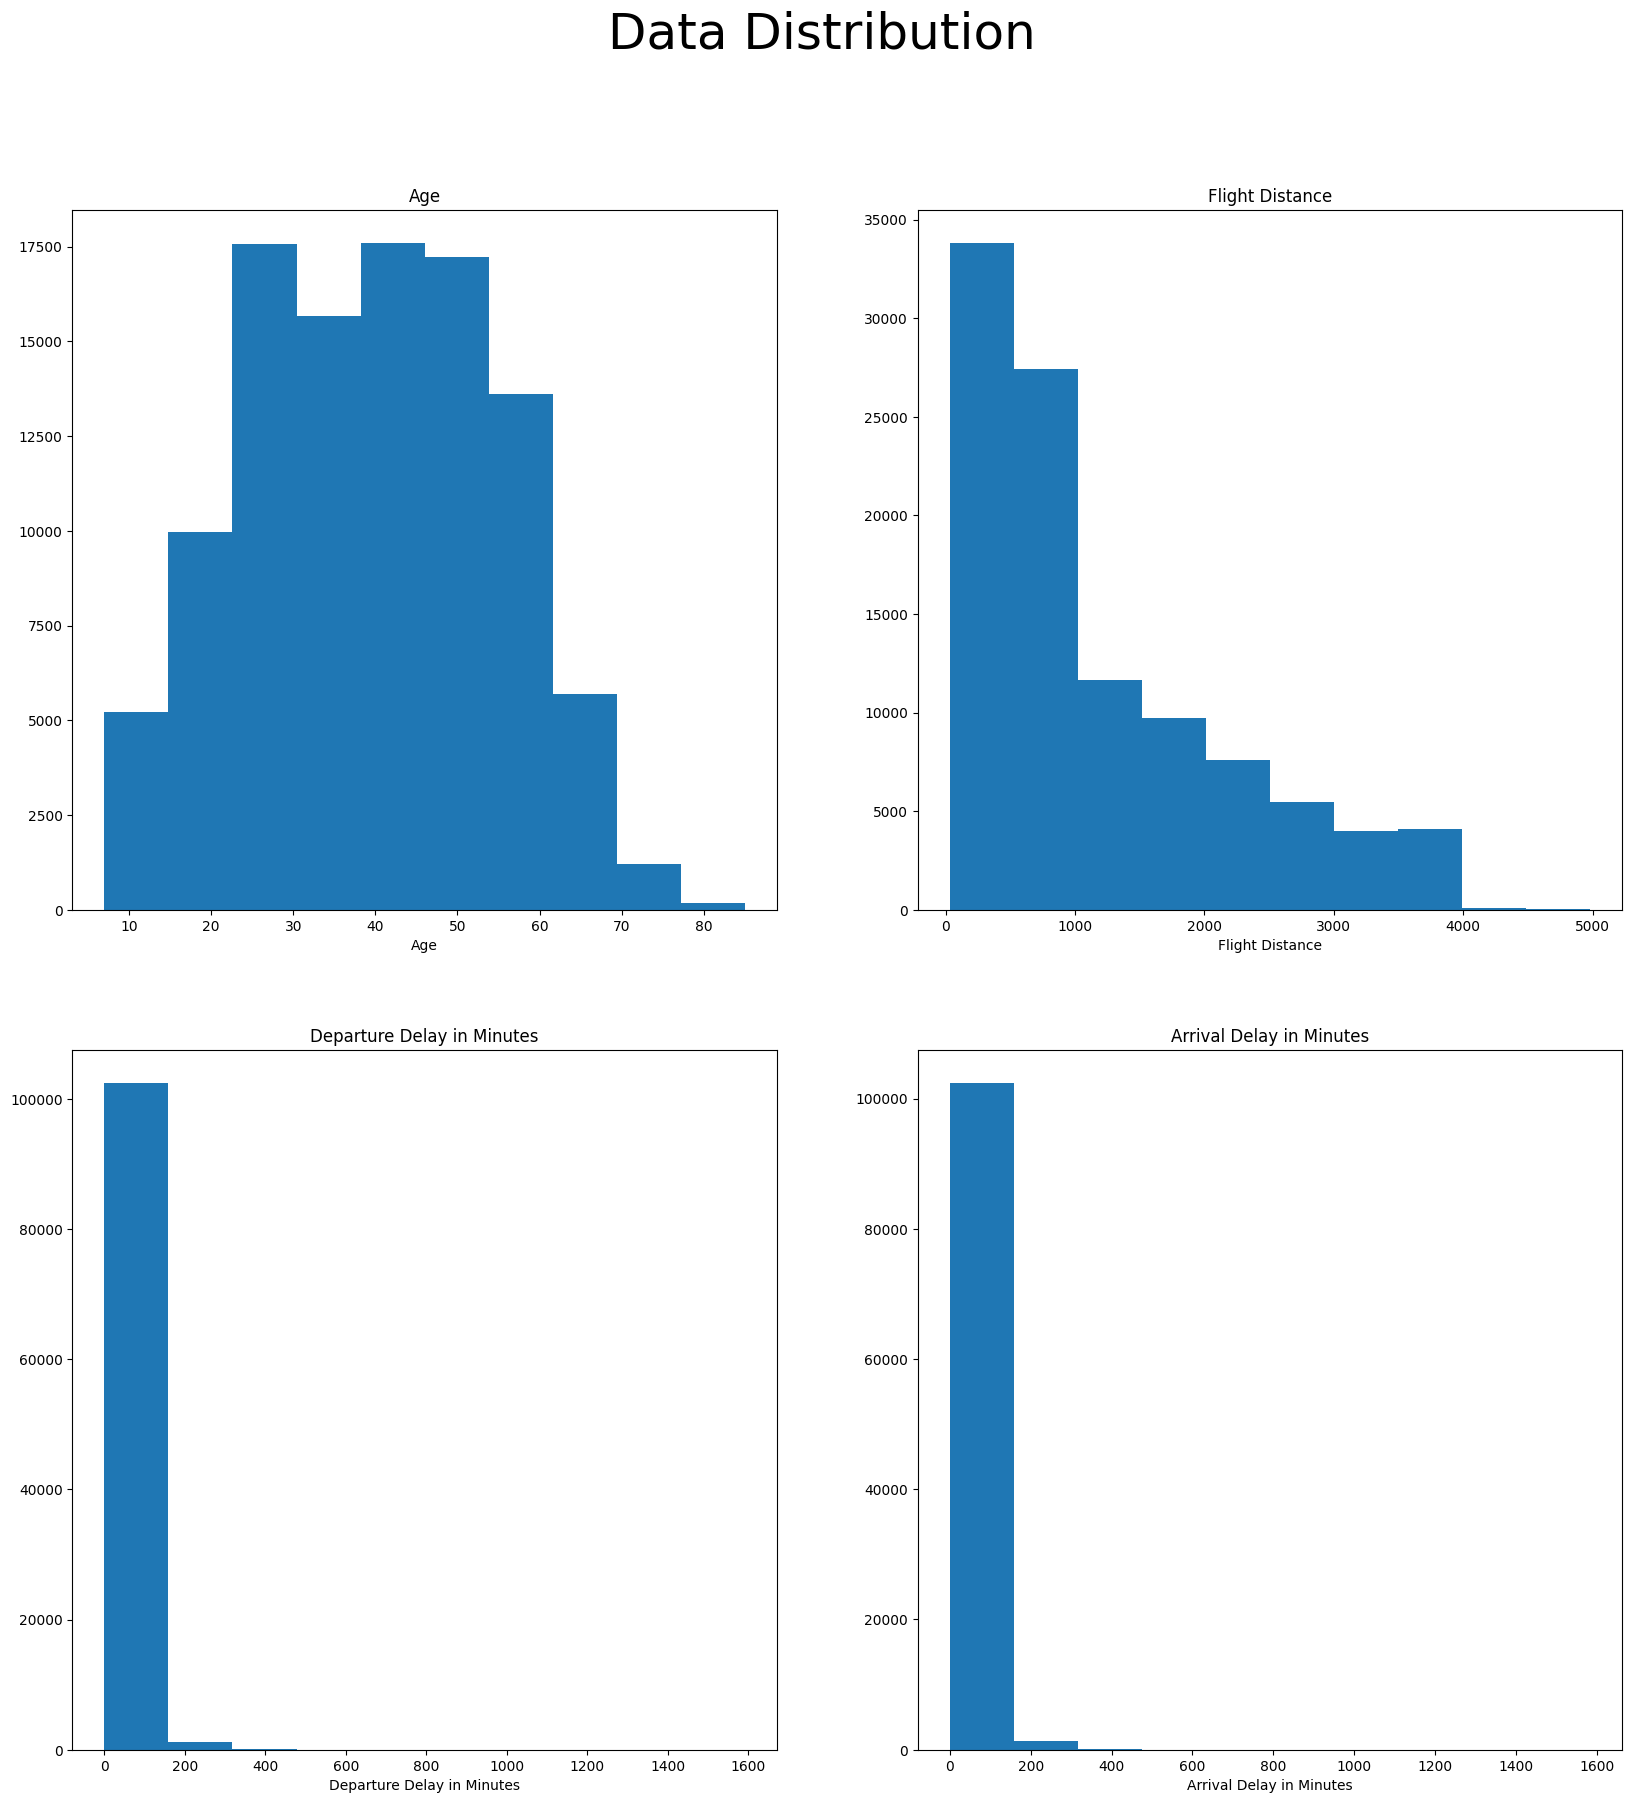

In [39]:
plt.figure(figsize=(20,20))

plt.subplot(2,2,1) 
plt.hist(df['Age'])
plt.xlabel('Age')
plt.title('Age')

plt.subplot(2,2,2) 
plt.hist(df['Flight Distance'])
plt.xlabel('Flight Distance')
plt.title('Flight Distance')

plt.subplot(2,2,3) 
plt.hist(df['Departure Delay in Minutes'])
plt.xlabel('Departure Delay in Minutes')
plt.title('Departure Delay in Minutes')

plt.subplot(2,2,4) 
plt.hist(df['Arrival Delay in Minutes'])
plt.xlabel('Arrival Delay in Minutes')
plt.title('Arrival Delay in Minutes')

plt.suptitle('Data Distribution',size=36)

plt.show()

In [40]:
column=['Age','Flight Distance','Departure Delay in Minutes','Arrival Delay in Minutes']

result=[]
for i in column:
    stats,pval=normaltest(df[i])
    if pval>0.05:
        result.append('Normally distibuted')
    else:
        result.append('Not normally distributed')

pd.DataFrame({'Column':column, 'Distribution':result})

,Column,Distribution
0,Age,Not normally distributed
1,Flight Distance,Not normally distributed
2,Departure Delay in Minutes,Not normally distributed
3,Arrival Delay in Minutes,Not normally distributed


Based on the histogram and normality test, the columns Age, Flight Distance, Departure Delay in Minutes, and Arrival Delay in Minutes do not follow a normal distribution.

## 3.2 Correlation

Now, we will examine the correlation to observe the relationships between variables in the data.

In [41]:
# Select only numeric columns
numeric_columns = df.select_dtypes(include=[np.number])

# Calculate the Spearman correlation on numeric columns only
corr = numeric_columns.corr(method='spearman')
corr


,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
Age,1.000000,0.072321,0.016518,0.036161,0.022983,-0.002103,0.020841,0.215725,0.161383,0.081574,0.070441,0.051864,-0.026338,0.039724,-0.031062,0.053716,-0.010894,-0.012443
Flight Distance,0.072321,1.000000,0.006456,-0.013443,0.066114,0.000750,0.046593,0.194100,0.137140,0.105091,0.099600,0.118062,0.060355,0.071707,0.059940,0.080697,0.026570,-0.001283
Inflight wifi service,0.016518,0.006456,1.000000,0.338860,0.711816,0.332789,0.132695,0.435733,0.118909,0.199700,0.116584,0.149572,0.113337,0.042710,0.105462,0.130628,-0.030202,-0.036675
Departure/Arrival time convenient,0.036161,-0.013443,0.338860,1.000000,0.439947,0.450214,0.002934,0.061735,0.011934,-0.009296,0.071701,0.007048,0.088548,0.099762,0.090800,0.013951,-0.002986,-0.005409
Ease of Online booking,0.022983,0.066114,0.711816,0.439947,1.000000,0.461921,0.029603,0.367667,0.026806,0.042821,0.037403,0.094560,0.037002,0.010690,0.035031,0.015249,-0.010656,-0.013823
Gate location,-0.002103,0.000750,0.332789,0.450214,0.461921,1.000000,-0.001142,-0.001374,0.001735,0.003030,-0.027975,-0.005588,-0.006472,-0.035812,-0.007133,-0.003750,0.004324,0.005600
Food and drink,0.020841,0.046593,0.132695,0.002934,0.029603,-0.001142,1.000000,0.241274,0.557754,0.610246,0.058136,0.031457,0.045529,0.083811,0.043877,0.647056,-0.021389,-0.032836
Online boarding,0.215725,0.194100,0.435733,0.061735,0.367667,-0.001374,0.241274,1.000000,0.440087,0.302319,0.175737,0.139163,0.118017,0.217763,0.108950,0.345629,-0.033044,-0.049659
Seat comfort,0.161383,0.137140,0.118909,0.011934,0.026806,0.001735,0.557754,0.440087,1.000000,0.603980,0.147481,0.119710,0.104604,0.199209,0.098379,0.667196,-0.020337,-0.037248
Inflight entertainment,0.081574,0.105091,0.199700,-0.009296,0.042821,0.003030,0.610246,0.302319,0.603980,1.000000,0.436907,0.314101,0.395773,0.121436,0.422208,0.680506,-0.027402,-0.044200


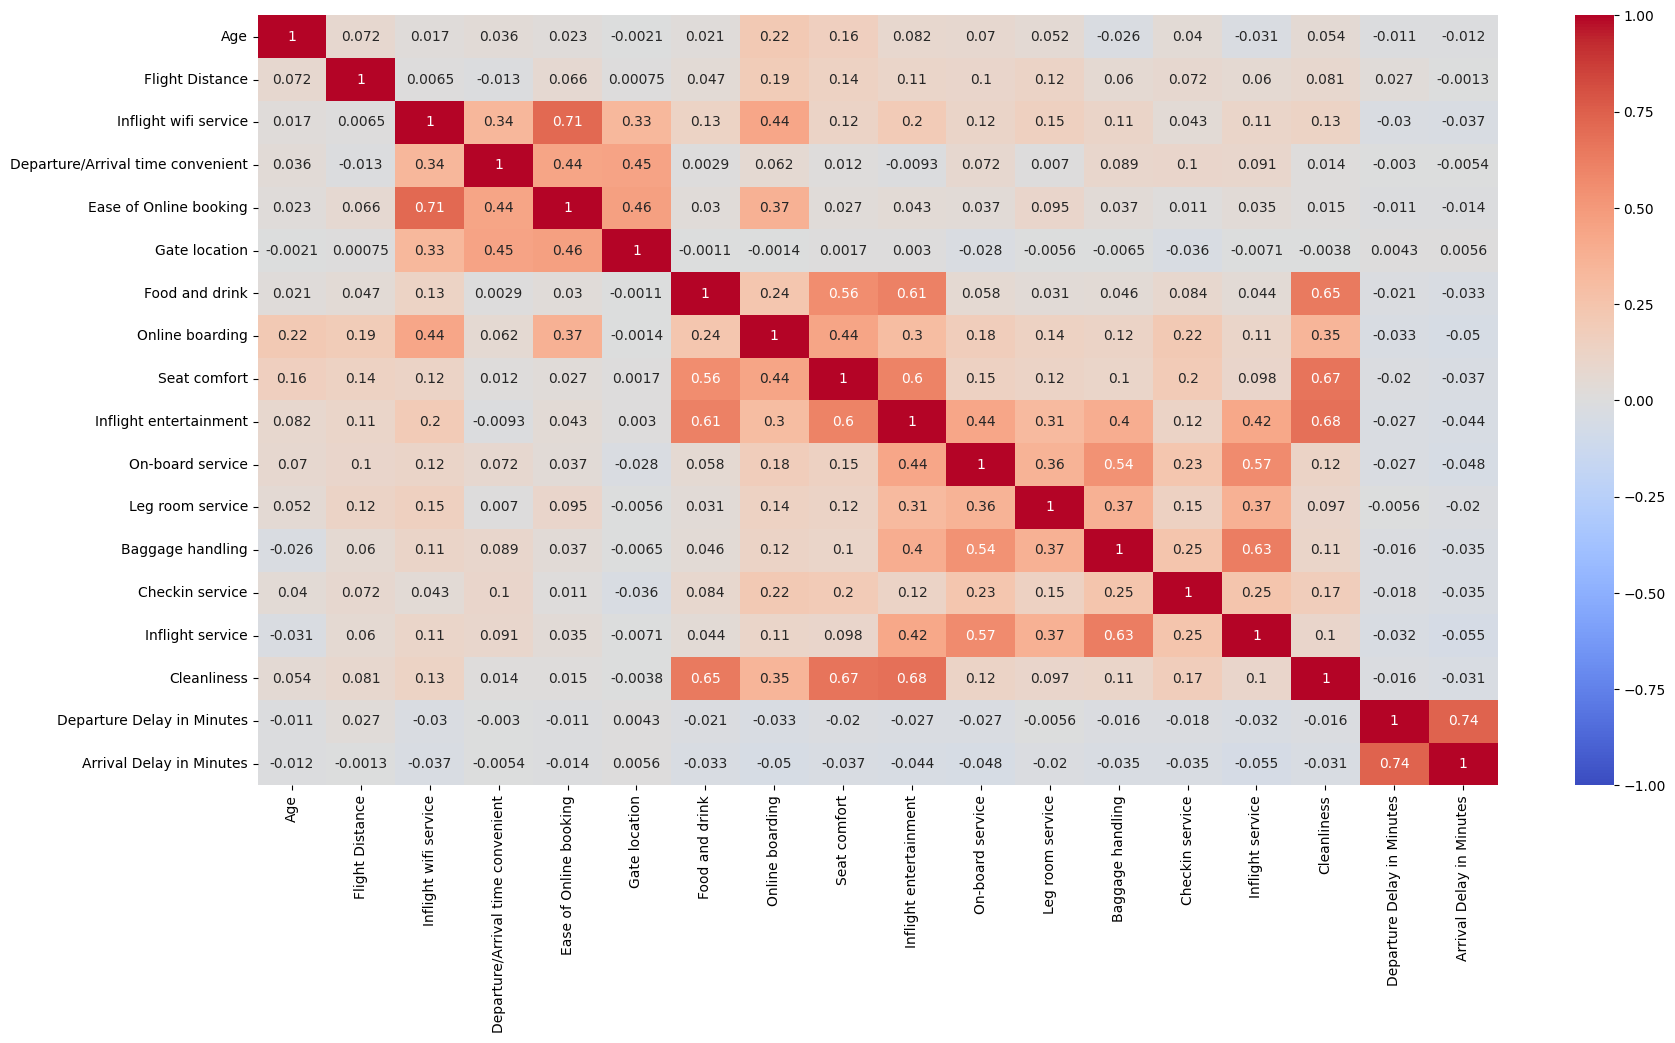

In [42]:
plt.figure(figsize=(20, 10))
sns.heatmap(corr, annot=True, vmin=-1, vmax=1, cmap="coolwarm")
plt.show()

The correlation value between Departure Delay in Minutes and Arrival Delay in Minutes is the highest at 0.74, indicating that the strongest correlation among all variables is between Departure Delay in Minutes and Arrival Delay in Minutes. This makes sense because the longer the delay at departure, the longer the delay at arrival is likely to be as well.

# 4. Data Analysis

After the data cleaning process, we can now proceed with data analysis to understand passenger satisfaction levels after their flights, as well as the factors influencing passengers who are satisfied and those who are neutral or dissatisfied with the airline services.

The analysis will focus on examining the general satisfaction of passengers who are satisfied versus those who are neutral or dissatisfied, and identifying the factors that affect passenger satisfaction related to airline services based on survey results, as well as passenger segmentation and flight history.


## 4.1 Overall Passenger Satisfaction with the Airline

In [43]:
df['satisfaction'].value_counts()

satisfaction
Neutral or Dissatisfied    58879
Satisfied                  45025
Name: count, dtype: int64

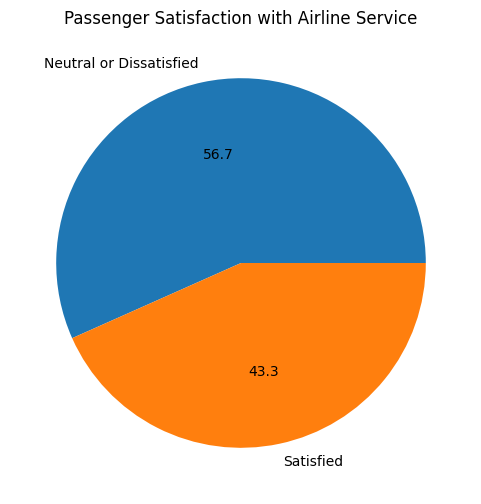

In [44]:
vc=df['satisfaction'].value_counts()
plt.figure(figsize=(6,6))
plt.pie(vc,labels=vc.index,
    autopct='%.1f')
plt.title('Passenger Satisfaction with Airline Service')
plt.show()

Overall, the majority of passengers, accounting for 56.7%, feel neutral or dissatisfied with the airline's services. Therefore, it is important to identify the factors that influence passenger satisfaction related to the airline's services in order to provide guidance for improving airline services in the future and increasing customer loyalty.

## 4.2 Factors Affecting Passenger Satisfaction with Airline Services

We will identify the factors that influence passenger satisfaction with airline services based on the general passenger satisfaction survey results, as well as passenger segmentation and flight history. By understanding the segmentation and flight history of passengers who are satisfied or neutral/displeased with the airline services, the airline company can develop service improvement plans that are more tailored to the characteristics of specific passenger groups.

## 4.2.1 Based on the Overall Satisfaction Survey Results

In [12]:
# Group by 'satisfaction' and calculate the mean for all columns
columns_to_convert = ['Inflight wifi service', 'Departure/Arrival time convenient', 'Ease of Online booking',
                      'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
                      'Inflight entertainment', 'On-board service', 'Leg room service', 
                      'Baggage handling', 'Checkin service', 'Inflight service', 'Cleanliness']

survei_satisfaction = df.groupby('satisfaction')[columns_to_convert].mean()
survei_satisfaction



,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness
satisfaction,,,,,,,,,,,,,,
Neutral or Dissatisfied,2.399633,3.129112,2.546850,2.976121,2.95805,2.656125,3.036295,2.894156,3.019158,2.990812,3.375991,3.042952,3.388814,2.936123
Satisfied,3.161288,2.970305,3.031582,2.977879,3.52131,4.027474,3.966530,3.964931,3.857324,3.822143,3.966396,3.646041,3.969461,3.744342


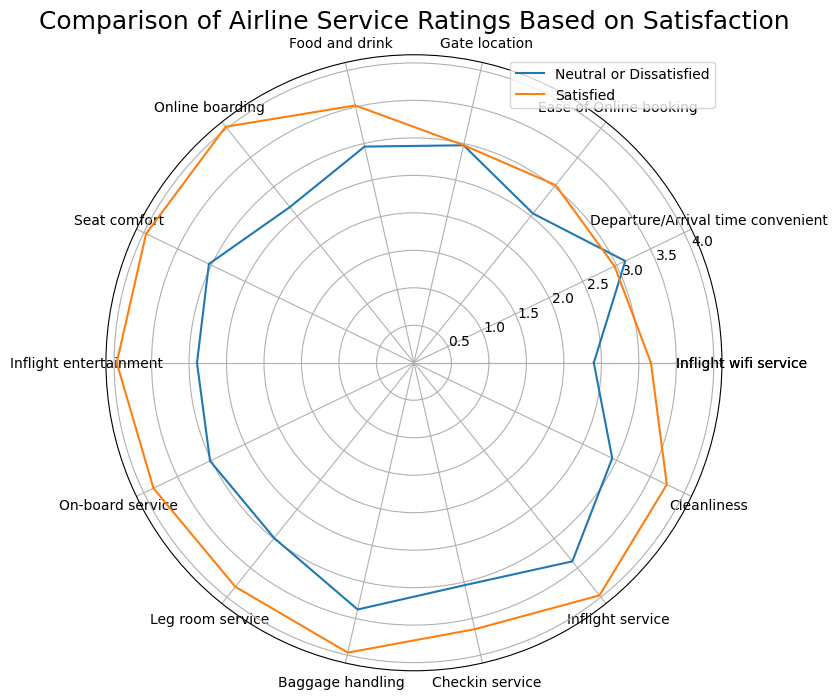

In [46]:
categories = ['Inflight wifi service','Departure/Arrival time convenient','Ease of Online booking','Gate location','Food and drink','Online boarding','Seat comfort','Inflight entertainment','On-board service','Leg room service','Baggage handling','Checkin service','Inflight service','Cleanliness']
categories = [*categories, categories[0]]

# Median
neutralordissatisfied = survei_satisfaction.loc['Neutral or Dissatisfied'].values
satisfied = survei_satisfaction.loc['Satisfied'].values
neutralordissatisfied = [*neutralordissatisfied, neutralordissatisfied[0]]
satisfied  = [*satisfied , satisfied [0]]

label_loc = np.linspace(start=0, stop=2 * np.pi, num=len(neutralordissatisfied))

plt.figure(figsize=(16, 8))
plt.subplot(polar=True)
plt.plot(label_loc, neutralordissatisfied, label='Neutral or Dissatisfied')
plt.plot(label_loc, satisfied, label='Satisfied')
plt.title('Comparison of Airline Service Ratings Based on Satisfaction', size=18)
lines, labels = plt.thetagrids(np.degrees(label_loc), labels=categories)
plt.legend(loc='best')
plt.show()

Aspects that are still rated lower than other service aspects, both by passengers who are satisfied and those who are neutral or dissatisfied with the overall service, include in-flight wifi service, ease of online booking, gate location, and convenience of departure and arrival times. Therefore, in the next step, we will examine the factors causing these aspects to be rated lower than other service aspects based on passenger segmentation and flight history.

## 4.2.2 Based on Passenger Segmentation and Flight History

### 1. Based on Customer Type
Before proceeding, we will analyze the passenger types based on their loyalty to the airline to see the characteristics of passengers who have been choosing the airline for a long time versus those who have recently chosen the airline.

In [47]:
df_ct_customertypesatisfaction=pd.crosstab(df['Customer Type'],df['satisfaction'],normalize='index')
df_ct_customertypesatisfaction

satisfaction,Neutral or Dissatisfied,Satisfied
Customer Type,,
Disloyal Customer,0.763342,0.236658
Loyal Customer,0.522709,0.477291


In [48]:
df_ct_customertypesatisfaction2=pd.crosstab(df['Customer Type'],df['satisfaction'])

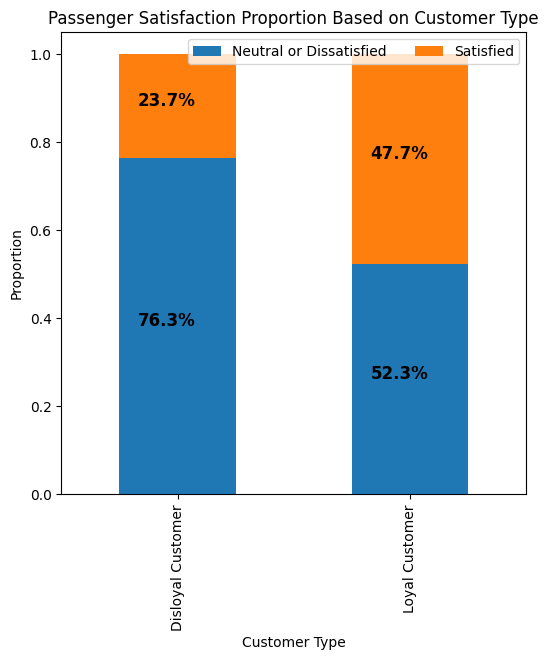

In [49]:
df_ct_customertypesatisfaction.plot(kind='bar', 
                        stacked=True,
                        figsize=(6, 6))

plt.legend(loc="upper right", ncol=2)
plt.xlabel("Customer Type")
plt.ylabel("Proportion")


for n, x in enumerate([*df_ct_customertypesatisfaction2.index.values]):
    for (proportion, y_loc) in zip(df_ct_customertypesatisfaction.loc[x],
                                   df_ct_customertypesatisfaction.loc[x].cumsum()):
                
        plt.text(x=n - 0.17,
                 y=(y_loc - proportion) + (proportion / 2),
                 s=f'{np.round(proportion * 100, 1)}%', 
                 color="black",
                 fontsize=12,
                 fontweight="bold")

plt.title('Passenger Satisfaction Proportion Based on Customer Type')
plt.show()

Disloyal customers are more likely to feel neutral or dissatisfied with the airline's services compared to loyal customers.

Now, we will statistically test whether the proportion of Disloyal Customers who feel neutral or dissatisfied is greater than the proportion of Loyal Customers who feel neutral or dissatisfied.

H0: The proportion of Disloyal Customers who feel neutral or dissatisfied is equal to the proportion of Loyal Customers who feel neutral or dissatisfied.  
H1: The proportion of Disloyal Customers who feel neutral or dissatisfied is greater than the proportion of Loyal Customers who feel neutral or dissatisfied.

In [50]:
df_ct_customertypesatisfaction=pd.crosstab(df['Customer Type'],df['satisfaction'])
df_ct_customertypesatisfaction

satisfaction,Neutral or Dissatisfied,Satisfied
Customer Type,,
Disloyal Customer,14489,4492
Loyal Customer,44390,40533


In [51]:
df_ct_customertypesatisfaction['Neutral or Dissatisfied']

Customer Type
Disloyal Customer    14489
Loyal Customer       44390
Name: Neutral or Dissatisfied, dtype: int64

In [52]:
df_ct_customertypesatisfaction.sum(axis=1)

Customer Type
Disloyal Customer    18981
Loyal Customer       84923
dtype: int64

In [53]:
from statsmodels.stats.proportion import proportions_ztest

z_stat,p_value=proportions_ztest(df_ct_customertypesatisfaction['Neutral or Dissatisfied'],df_ct_customertypesatisfaction.sum(axis=1),alternative='larger')
print(float(z_stat), float(p_value))

60.483557225689474 0.0


Since the p-value < 0.05, we have enough evidence to reject H0, meaning that the proportion of Disloyal Customers who feel neutral or dissatisfied is greater than the proportion of Loyal Customers who feel neutral or dissatisfied. This makes sense because passengers who are dissatisfied with the airline’s service are less likely to remain loyal and continue choosing the same airline.

Now, let's further examine the differences in characteristics between Disloyal Customers and Loyal Customers.

In [54]:
df_ct_customertypegender=pd.crosstab(df['Customer Type'],df['Gender'],normalize='index')
df_ct_customertypegender

Gender,Female,Male
Customer Type,,
Disloyal Customer,0.541015,0.458985
Loyal Customer,0.499959,0.500041


In [55]:
df_ct_customertypegender2=pd.crosstab(df['Customer Type'],df['Gender'])

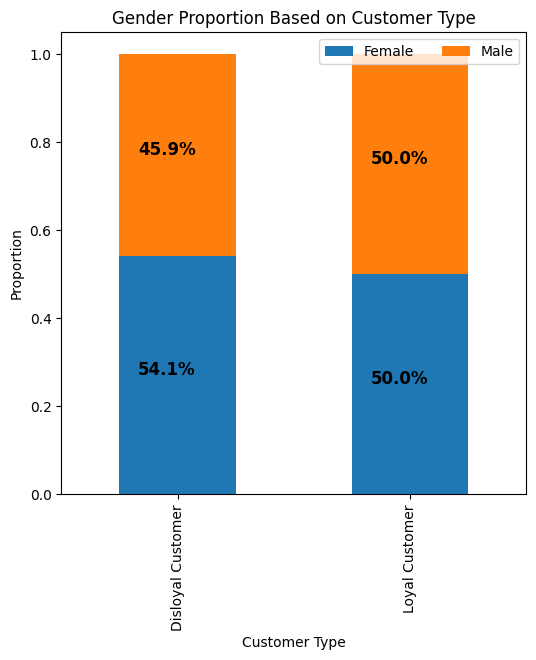

In [56]:
df_ct_customertypegender.plot(kind='bar', 
                        stacked=True,
                        figsize=(6, 6))

plt.legend(loc="upper right", ncol=2)
plt.xlabel("Customer Type")
plt.ylabel("Proportion")


for n, x in enumerate([*df_ct_customertypegender2.index.values]):
    for (proportion, y_loc) in zip(df_ct_customertypegender.loc[x],
                                   df_ct_customertypegender.loc[x].cumsum()):
                
        plt.text(x=n - 0.17,
                 y=(y_loc - proportion) + (proportion / 2),
                 s=f'{np.round(proportion * 100, 1)}%', 
                 color="black",
                 fontsize=12,
                 fontweight="bold")

plt.title('Gender Proportion Based on Customer Type')
plt.show()

In [57]:
df.pivot_table(values='Gender',index=['Customer Type','Type of Travel'],columns='Class',aggfunc='count')

Class                              Business    Eco  Eco Plus
Customer Type     Type of Travel                            
Disloyal Customer Business Travel      7345  10761       711
                  Personal Travel        11    149         4
Loyal Customer    Business Travel     40163   9496      3179
                  Personal Travel      2146  26339      3600

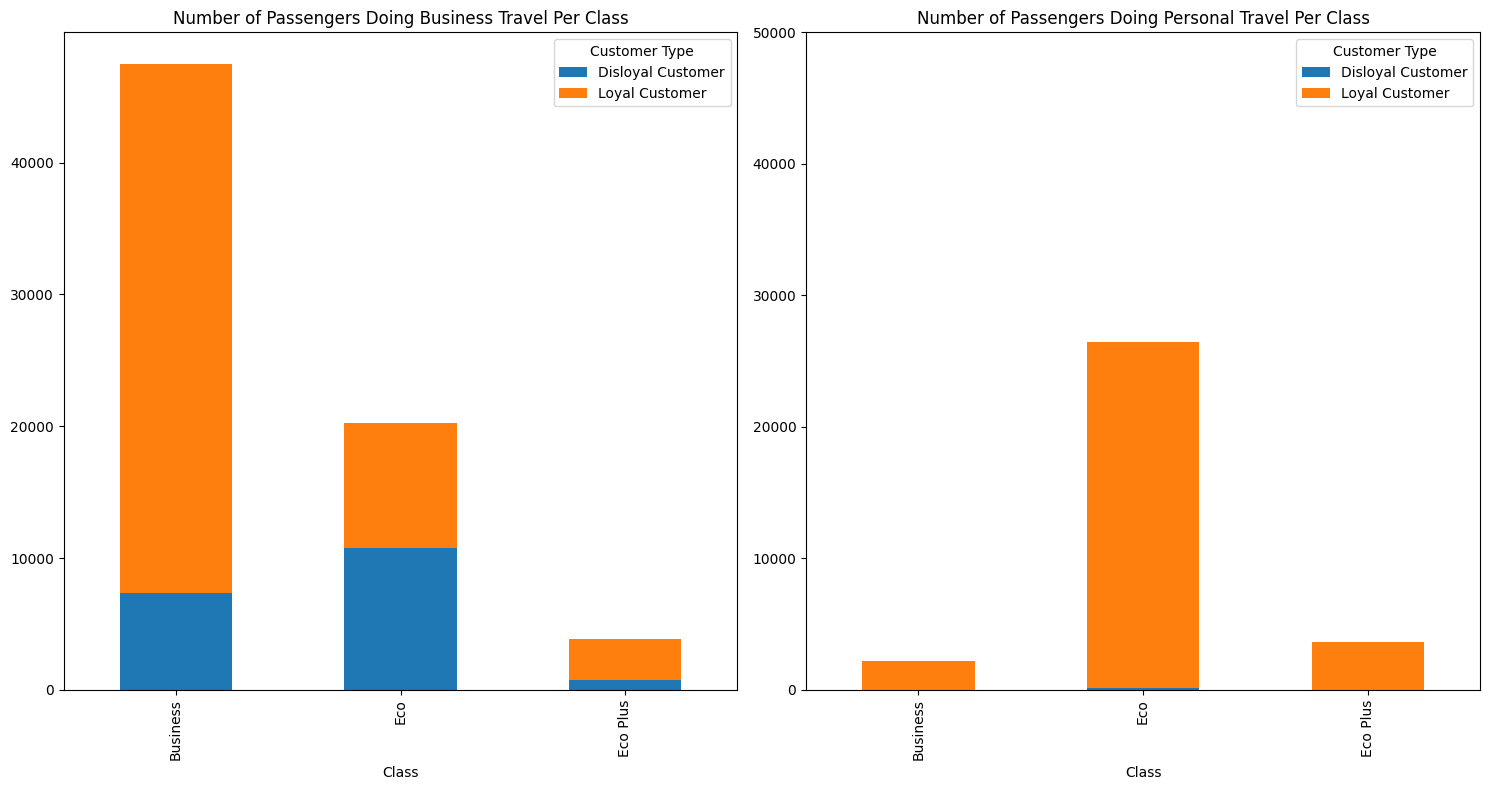

In [58]:
df_plot_business=df[df['Type of Travel']=='Business Travel'].groupby(['Customer Type','Class']).size().reset_index().pivot(columns='Customer Type', index='Class', values=0)
df_plot_personal=df[df['Type of Travel']=='Personal Travel'].groupby(['Customer Type','Class']).size().reset_index().pivot(columns='Customer Type', index='Class', values=0)

figure,axis=plt.subplots(1,2,figsize=(15,8))

df_plot_business.plot(kind='bar',stacked=True,ax=axis[0]).set_title('Number of Passengers Doing Business Travel Per Class')
df_plot_personal.plot(kind='bar',stacked=True,ax=axis[1]).set_title('Number of Passengers Doing Personal Travel Per Class')

plt.ylim(0, 50000)
plt.tight_layout()
plt.show()

In [59]:
df.groupby('Customer Type')['Age'].median()

Customer Type
Disloyal Customer    27.0
Loyal Customer       43.0
Name: Age, dtype: float64

In [60]:
df.groupby('Customer Type')['Flight Distance'].median()

Customer Type
Disloyal Customer    598.0
Loyal Customer       925.0
Name: Flight Distance, dtype: float64

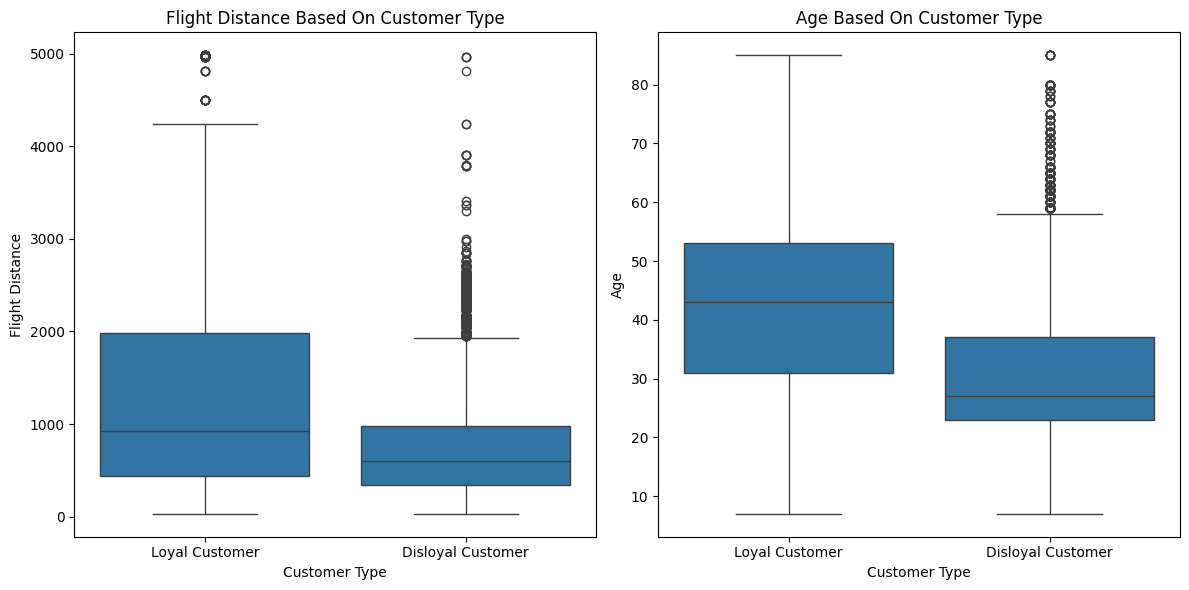

In [61]:
figure,axis=plt.subplots(1,2,figsize=(12,6))

sns.boxplot(data=df,y='Age',x='Customer Type',ax=axis[1]).set_title('Age Based On Customer Type')
sns.boxplot(data=df,y='Flight Distance',x='Customer Type',ax=axis[0]).set_title('Flight Distance Based On Customer Type')

plt.tight_layout()
plt.show()

The characteristics of passengers who are Disloyal Customers are as follows:
* The proportion of female and male Disloyal Customers is not significantly different.
* Passengers who travel for Business purposes tend to be more disloyal compared to those who travel for Personal purposes, especially in the Economy Class.
* The majority of Disloyal Customers have a younger median age, with a median age of 27 years, compared to Loyal Customers who have a median age of 43 years.
* The majority of Disloyal Customers travel shorter distances, with a median flight distance of 598 miles, compared to Loyal Customers who travel a median distance of 925 miles.

### 2. Based on Passenger Gender

In [62]:
# Proporsi Kepuasaan Penumpang Pria dan Wanita
df_ct_gendersatisfaction=pd.crosstab(df['Gender'],df['satisfaction'],normalize='index')
df_ct_gendersatisfaction

satisfaction,Neutral or Dissatisfied,Satisfied
Gender,,
Female,0.572629,0.427371
Male,0.560525,0.439475


In [63]:
df_ct_gendersatisfaction2=pd.crosstab(df['Gender'],df['satisfaction'])

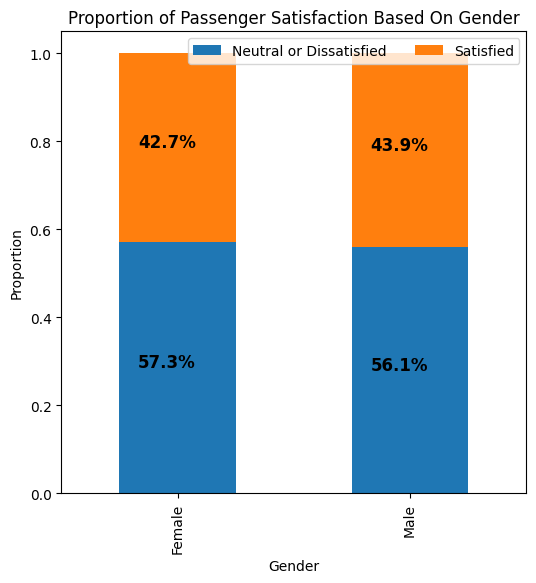

In [64]:
df_ct_gendersatisfaction.plot(kind='bar', 
                        stacked=True,
                        figsize=(6, 6))

plt.legend(loc="upper right", ncol=2)
plt.xlabel("Gender")
plt.ylabel("Proportion")


for n, x in enumerate([*df_ct_gendersatisfaction2.index.values]):
    for (proportion, y_loc) in zip(df_ct_gendersatisfaction.loc[x],
                                   df_ct_gendersatisfaction.loc[x].cumsum()):
                
        plt.text(x=n - 0.17,
                 y=(y_loc - proportion) + (proportion / 2),
                 s=f'{np.round(proportion * 100, 1)}%', 
                 color="black",
                 fontsize=12,
                 fontweight="bold")

plt.title('Proportion of Passenger Satisfaction Based On Gender')
plt.show()

In general, the satisfaction with the airline service is not significantly influenced by the gender of the passengers, as the proportion of male and female passengers who feel neutral or dissatisfied with the service is approximately the same. For both male and female passengers, the majority still feel neutral or dissatisfied with the service they received.

Now, we will test statistically whether the proportion of female passengers who feel neutral or dissatisfied is indeed approximately the same as the proportion of male passengers who feel neutral or dissatisfied.

H0: The proportion of female passengers who feel neutral or dissatisfied is the same as the proportion of male passengers who feel neutral or dissatisfied.  
H1: The proportion of female passengers who feel neutral or dissatisfied is smaller than the proportion of male passengers who feel neutral or dissatisfied.  

In [65]:
df_ct_gendersatisfaction=pd.crosstab(df['Gender'],df['satisfaction'])
df_ct_gendersatisfaction

satisfaction,Neutral or Dissatisfied,Satisfied
Gender,,
Female,30193,22534
Male,28686,22491


In [66]:
df_ct_gendersatisfaction['Neutral or Dissatisfied']

Gender
Female    30193
Male      28686
Name: Neutral or Dissatisfied, dtype: int64

In [67]:
df_ct_gendersatisfaction.sum(axis=1)

Gender
Female    52727
Male      51177
dtype: int64

In [68]:
from statsmodels.stats.proportion import proportions_ztest

stat, p_value = proportions_ztest(df_ct_gendersatisfaction['Neutral or Dissatisfied'], df_ct_gendersatisfaction.sum(axis=1), alternative='smaller')
stat = float(stat)
p_value = float(p_value)
print(f"Z-statistic: {stat}, p-value: {p_value}")


Z-statistic: 3.9361998006419423, p-value: 0.9999586089701724


Since the p-value > 0.05, we do not have enough evidence to reject H0. Therefore, the proportion of female passengers who feel neutral or dissatisfied is not smaller than the proportion of male passengers who feel neutral or dissatisfied. In other words, the proportion of female passengers who feel neutral or dissatisfied is approximately the same as the proportion of male passengers who feel neutral or dissatisfied.

/var/folders/8c/r5j32l2d2nl16c26gg7ln5p80000gn/T/ipykernel_86386/2327529031.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df,y='Ease of Online booking',x='satisfaction',hue='Gender',estimator=np.mean,ax=axis[1,0],ci=None).set_title('Mean Rating of Ease of Online Booking Based On Passenger Gender')


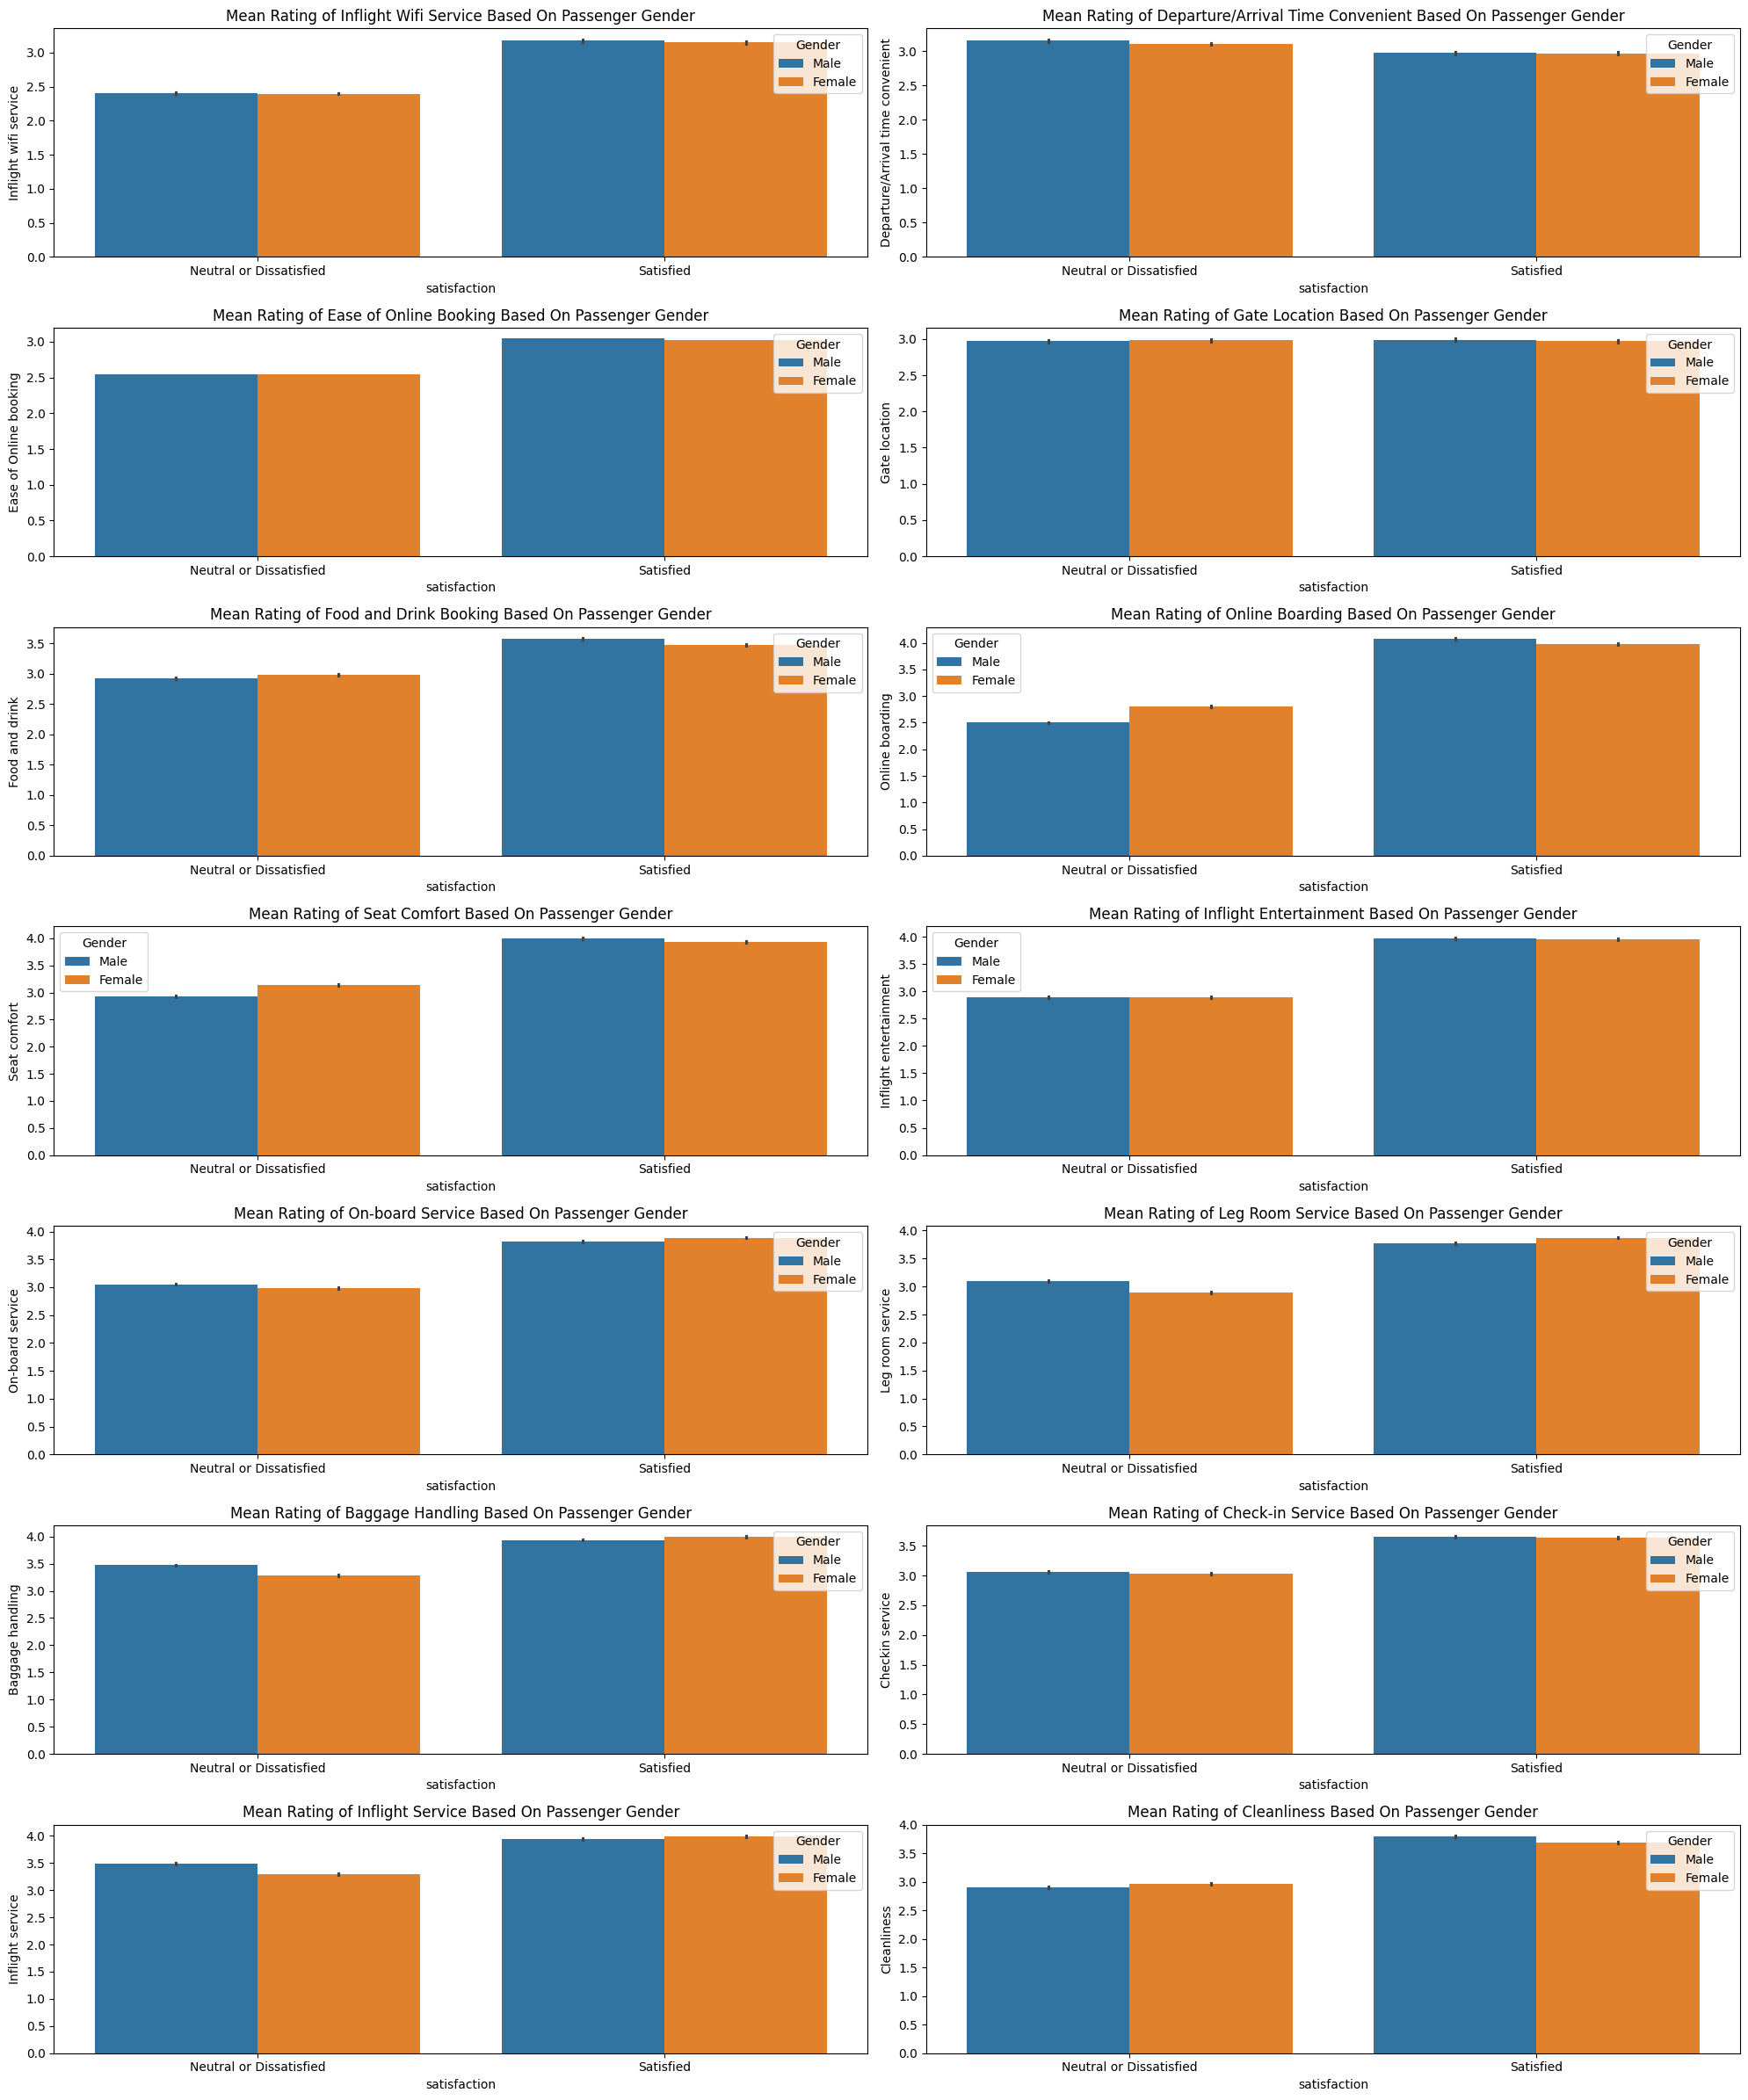

In [69]:
figure,axis=plt.subplots(7,2,figsize=(20,24))

sns.barplot(data=df,y='Inflight wifi service',x='satisfaction',hue='Gender',estimator=np.mean,ax=axis[0,0]).set_title('Mean Rating of Inflight Wifi Service Based On Passenger Gender')
sns.barplot(data=df,y='Departure/Arrival time convenient',x='satisfaction',hue='Gender',estimator=np.mean,ax=axis[0,1]).set_title('Mean Rating of Departure/Arrival Time Convenient Based On Passenger Gender')
sns.barplot(data=df,y='Ease of Online booking',x='satisfaction',hue='Gender',estimator=np.mean,ax=axis[1,0],ci=None).set_title('Mean Rating of Ease of Online Booking Based On Passenger Gender')
sns.barplot(data=df,y='Gate location',x='satisfaction',hue='Gender',estimator=np.mean,ax=axis[1,1]).set_title('Mean Rating of Gate Location Based On Passenger Gender')
sns.barplot(data=df,y='Food and drink',x='satisfaction',hue='Gender',estimator=np.mean,ax=axis[2,0]).set_title('Mean Rating of Food and Drink Booking Based On Passenger Gender')
sns.barplot(data=df,y='Online boarding',x='satisfaction',hue='Gender',estimator=np.mean,ax=axis[2,1]).set_title('Mean Rating of Online Boarding Based On Passenger Gender')
sns.barplot(data=df,y='Seat comfort',x='satisfaction',hue='Gender',estimator=np.mean,ax=axis[3,0]).set_title('Mean Rating of Seat Comfort Based On Passenger Gender')
sns.barplot(data=df,y='Inflight entertainment',x='satisfaction',hue='Gender',estimator=np.mean,ax=axis[3,1]).set_title('Mean Rating of Inflight Entertainment Based On Passenger Gender')
sns.barplot(data=df,y='On-board service',x='satisfaction',hue='Gender',estimator=np.mean,ax=axis[4,0]).set_title('Mean Rating of On-board Service Based On Passenger Gender')
sns.barplot(data=df,y='Leg room service',x='satisfaction',hue='Gender',estimator=np.mean,ax=axis[4,1]).set_title('Mean Rating of Leg Room Service Based On Passenger Gender')
sns.barplot(data=df,y='Baggage handling',x='satisfaction',hue='Gender',estimator=np.mean,ax=axis[5,0]).set_title('Mean Rating of Baggage Handling Based On Passenger Gender')
sns.barplot(data=df,y='Checkin service',x='satisfaction',hue='Gender',estimator=np.mean,ax=axis[5,1]).set_title('Mean Rating of Check-in Service Based On Passenger Gender')
sns.barplot(data=df,y='Inflight service',x='satisfaction',hue='Gender',estimator=np.mean,ax=axis[6,0]).set_title('Mean Rating of Inflight Service Based On Passenger Gender')
sns.barplot(data=df,y='Cleanliness',x='satisfaction',hue='Gender',estimator=np.mean,ax=axis[6,1]).set_title('Mean Rating of Cleanliness Based On Passenger Gender')

plt.tight_layout()
plt.show()

In general, the satisfaction with the airline's service is not significantly influenced by the passengers' gender, as there is no noticeable difference between the mean service ratings given by male and female passengers.

### 3. Based on Type of Travel and Class

We will first examine the market of airline passengers based on the type of travel and passenger class.

In [70]:
# The number of types of travel and passenger classes
pd.crosstab(df['Type of Travel'],df['Class'])

Class,Business,Eco,Eco Plus
Type of Travel,,,
Business Travel,47508,20257,3890
Personal Travel,2157,26488,3604


In [71]:
# The proportion of passenger types and classes
pd.crosstab(df['Type of Travel'],df['Class'],normalize='all')

Class,Business,Eco,Eco Plus
Type of Travel,,,
Business Travel,0.45723,0.194959,0.037438
Personal Travel,0.02076,0.254928,0.034686


In [72]:
df_piechart = pd.DataFrame([['Business Travel', 'Business', 47508],
                   ['Business Travel', 'Eco', 20257],
                   ['Business Travel', 'Eco Plus',3890],
                   ['Personal Travel', 'Business',2157],
                   ['Personal Travel', 'Eco',26488],
                   ['Personal Travel', 'Eco Plus',3604]])
df_piechart.columns = ['Type of Travel', 'Class', 'n']

In [73]:
outer = df_piechart.groupby('Type of Travel').sum()

In [74]:
inner = df_piechart.groupby(['Type of Travel', 'Class']).sum()
inner

n
Type of Travel  Class          
Business Travel Business  47508
                Eco       20257
                Eco Plus   3890
Personal Travel Business   2157
                Eco       26488
                Eco Plus   3604

In [75]:
inner_labels = inner.index.get_level_values(1)

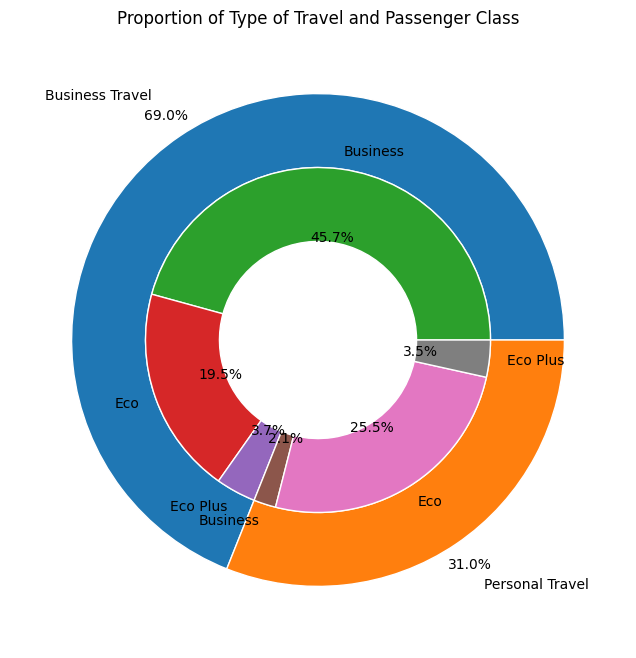

In [76]:
fig, ax = plt.subplots(figsize=(12, 8))
size = 0.3

# Plot the outer pie chart
ax.pie(outer['n'], radius=1,
       labels=outer.index,
       autopct='%1.1f%%',
       pctdistance=1.1, labeldistance=1.2,
       wedgeprops=dict(width=size, edgecolor='w'))

# Plot the inner pie chart
ax.pie(inner['n'], radius=1-size, 
       labels=inner_labels,
       autopct='%1.1f%%',
       wedgeprops=dict(width=size, edgecolor='w'))

ax.set(aspect="equal", title='Proportion of Type of Travel and Passenger Class')
plt.show()


Based on the pie chart, 69% of passengers are traveling for Business Travel, while 31% are traveling for Personal Travel.

* Passengers traveling for Business Travel tend to prefer Business Class, while passengers traveling for Personal Travel tend to prefer Economy Class. This may be because passengers traveling for Business Travel are more willing to spend extra money for the comfort and premium facilities offered by Business Class.
* The three largest markets for the airline based on type of travel and class are Business Class passengers traveling for Business Travel (45.7%), Economy Class passengers traveling for Personal Travel (25.5%), and Economy Class passengers traveling for Business Travel (19.5%).

Now, let's look at passenger satisfaction based on type of travel and class.

In [77]:
pivot_typeoftravel_class=df.pivot_table(values='Gender',index=['satisfaction','Type of Travel'],columns='Class',aggfunc='count')
pivot_typeoftravel_class

Class                                    Business    Eco  Eco Plus
satisfaction            Type of Travel                            
Neutral or Dissatisfied Business Travel     13292  14257      2360
                        Personal Travel      1893  23787      3290
Satisfied               Business Travel     34216   6000      1530
                        Personal Travel       264   2701       314

In [78]:
df_ct_typeoftravelsatisfaction=pd.crosstab(df['Type of Travel'],df['satisfaction'],normalize='index')
df_ct_typeoftravelsatisfaction


satisfaction,Neutral or Dissatisfied,Satisfied
Type of Travel,,
Business Travel,0.417403,0.582597
Personal Travel,0.898322,0.101678


In [79]:
df_ct_typeoftravelsatisfaction2=pd.crosstab(df['Type of Travel'],df['satisfaction'])

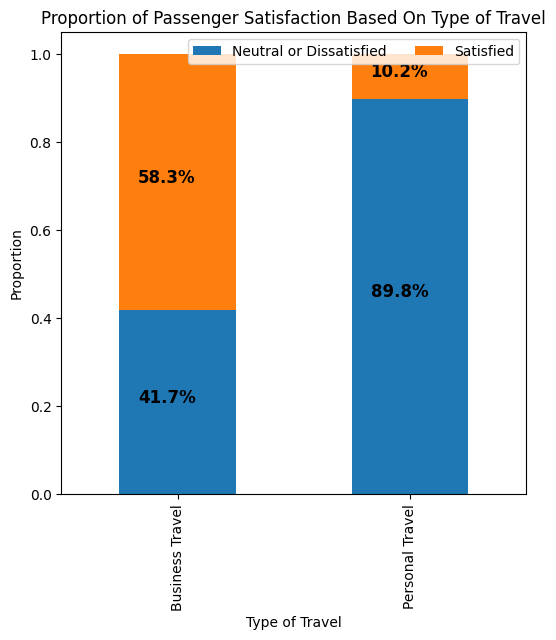

In [80]:
df_ct_typeoftravelsatisfaction.plot(kind='bar', 
                        stacked=True,
                        figsize=(6, 6))

plt.legend(loc="upper right", ncol=2)
plt.xlabel("Type of Travel")
plt.ylabel("Proportion")


for n, x in enumerate([*df_ct_typeoftravelsatisfaction2.index.values]):
    for (proportion, y_loc) in zip(df_ct_typeoftravelsatisfaction.loc[x],
                                   df_ct_typeoftravelsatisfaction.loc[x].cumsum()):
                
        plt.text(x=n - 0.17,
                 y=(y_loc - proportion) + (proportion / 2),
                 s=f'{np.round(proportion * 100, 1)}%', 
                 color="black",
                 fontsize=12,
                 fontweight="bold")

plt.title('Proportion of Passenger Satisfaction Based On Type of Travel')
plt.show()

In general, passengers who are traveling for Personal Travel are much more likely to feel neutral or dissatisfied compared to those traveling for Business Travel. Passengers traveling for Personal Travel even have a dissatisfaction or neutral rate of up to 90% regarding the airline's service. Therefore, we need to specifically analyze the factors that contribute to such a high level of dissatisfaction among passengers traveling for Personal Travel.

In [81]:
df_ct_classsatisfaction=pd.crosstab(df['Class'],df['satisfaction'],normalize='index')
df_ct_classsatisfaction

satisfaction,Neutral or Dissatisfied,Satisfied
Class,,
Business,0.305749,0.694251
Eco,0.813862,0.186138
Eco Plus,0.753936,0.246064


In [82]:
df_ct_classsatisfaction2=pd.crosstab(df['Class'],df['satisfaction'])

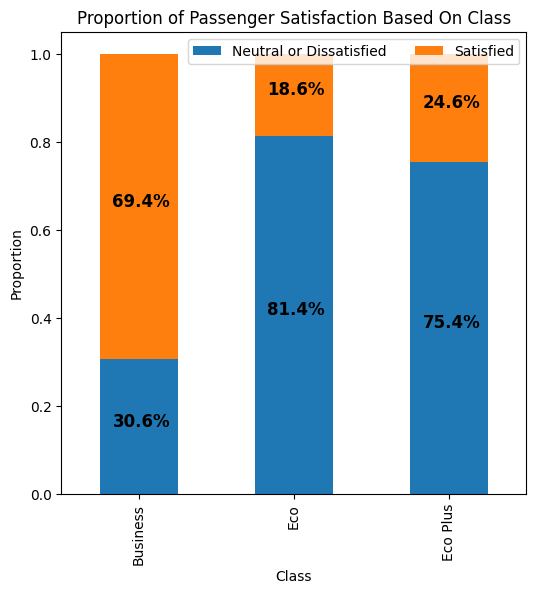

In [83]:
df_ct_classsatisfaction.plot(kind='bar', 
                        stacked=True,
                        figsize=(6, 6))

plt.legend(loc="upper right", ncol=2)
plt.xlabel("Class")
plt.ylabel("Proportion")

for n, x in enumerate([*df_ct_classsatisfaction2.index.values]):
    for (proportion, y_loc) in zip(df_ct_classsatisfaction.loc[x],
                                   df_ct_classsatisfaction.loc[x].cumsum()):
                
        plt.text(x=n - 0.17,
                 y=(y_loc - proportion) + (proportion / 2),
                 s=f'{np.round(proportion * 100, 1)}%', 
                 color="black",
                 fontsize=12,
                 fontweight="bold")

plt.title('Proportion of Passenger Satisfaction Based On Class')
plt.show()

Passengers who are traveling for Personal Travel generally prefer to use Class Eco and Eco Plus. As a result, passengers in Class Eco and Eco Plus are more likely to feel neutral or dissatisfied compared to passengers in Class Business. Therefore, the choice of Economy Class, which is commonly selected by passengers traveling for Personal Travel, is a factor contributing to the high level of dissatisfaction among these passengers.

In [84]:
df.pivot_table(values='Gender',index=['satisfaction','Type of Travel'],columns='Class',aggfunc='count')

Class                                    Business    Eco  Eco Plus
satisfaction            Type of Travel                            
Neutral or Dissatisfied Business Travel     13292  14257      2360
                        Personal Travel      1893  23787      3290
Satisfied               Business Travel     34216   6000      1530
                        Personal Travel       264   2701       314

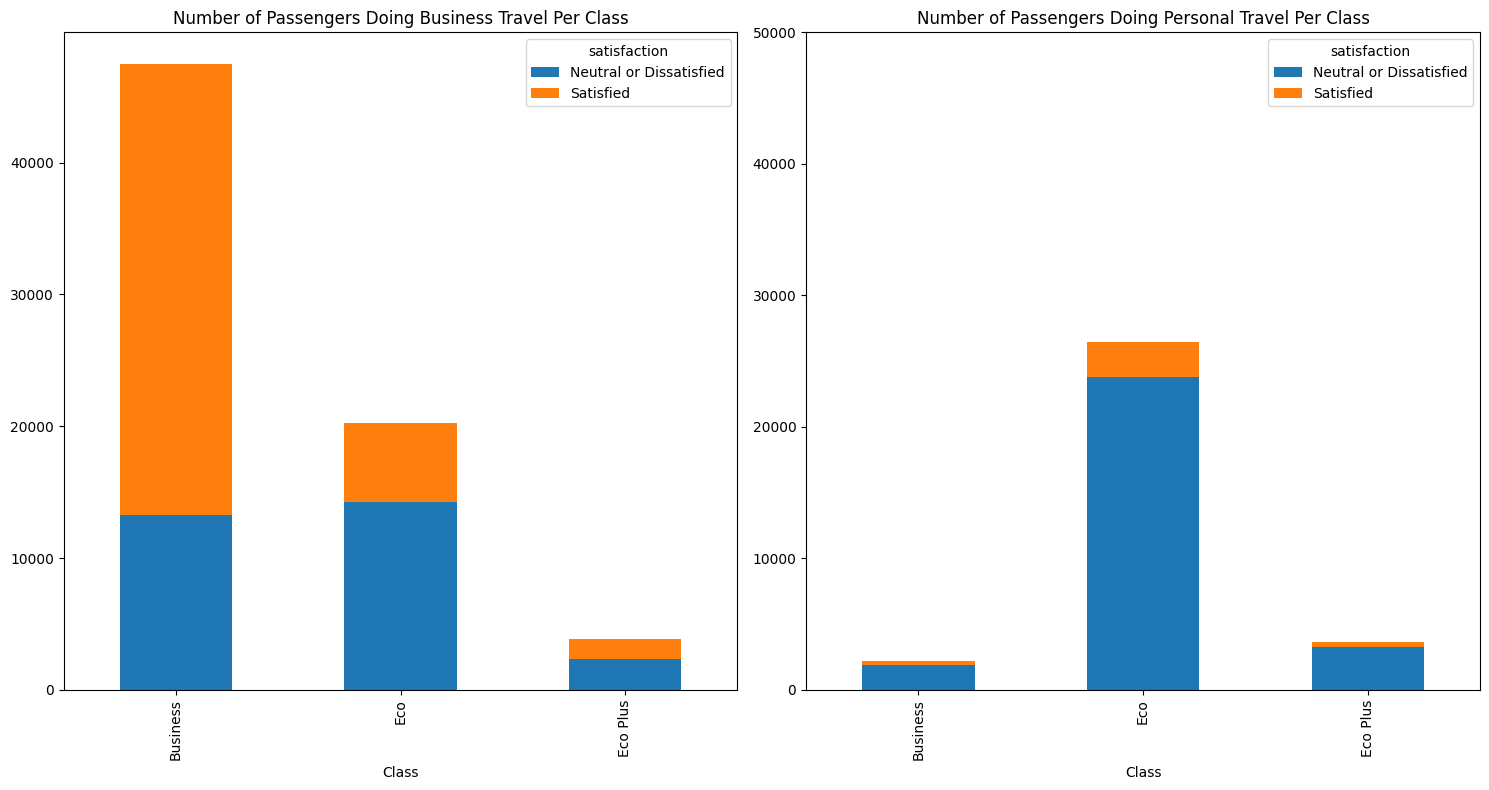

In [85]:
df_plot_business=df[df['Type of Travel']=='Business Travel'].groupby(['satisfaction','Class']).size().reset_index().pivot(columns='satisfaction', index='Class', values=0)
df_plot_personal=df[df['Type of Travel']=='Personal Travel'].groupby(['satisfaction','Class']).size().reset_index().pivot(columns='satisfaction', index='Class', values=0)

figure,axis=plt.subplots(1,2,figsize=(15,8))

df_plot_business.plot(kind='bar',stacked=True,ax=axis[0]).set_title('Number of Passengers Doing Business Travel Per Class')
df_plot_personal.plot(kind='bar',stacked=True,ax=axis[1]).set_title('Number of Passengers Doing Personal Travel Per Class')

plt.ylim(0, 50000)
plt.tight_layout()
plt.show()

* Passengers who are traveling for Business Travel with Class Business, which represents the largest segment of the airline’s passengers based on type of travel and class, seem to be satisfied with the airline’s service.  
* However, passengers who are traveling for either Personal Travel or Business Travel with Class Eco appear to feel neutral or dissatisfied with the airline’s service. This indicates that we need to further analyze the factors contributing to the neutral or dissatisfaction of passengers, as passengers in Class Eco traveling for either Personal Travel or Business Travel represent a significant portion of the airline’s market (45% of total passengers).  

* Moreover, passengers traveling for Business Travel in Class Economy are mostly disloyal customers or passengers who have not been using the airline for long. This suggests that recent service might not have been satisfactory for Business Travel passengers in Class Economy. If the service is not improved, these passengers may switch to another airline.  
* On the other hand, passengers who are traveling for Personal Travel in Class Economy are mostly loyal customers, yet still dissatisfied with the airline’s service. This implies that although passengers have been using the airline for a long time and are dissatisfied, the majority of them still choose to fly with the airline. This could be due to economic factors, which may be a key reason why these Personal Travel passengers in Class Economy continue to choose the airline despite their dissatisfaction.

In [86]:
survei_class=df.groupby('Class')[['Inflight wifi service','Departure/Arrival time convenient','Ease of Online booking','Gate location','Food and drink','Online boarding','Seat comfort','Inflight entertainment','On-board service','Leg room service','Baggage handling','Checkin service','Inflight service','Cleanliness']].mean()
survei_class

,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness
Class,,,,,,,,,,,,,,
Business,2.775315,2.905910,2.913964,2.982926,3.323165,3.716541,3.760858,3.635437,3.679472,3.644498,3.842907,3.519178,3.844579,3.477600
Eco,2.675067,3.199123,2.605241,2.971954,3.086277,2.812985,3.138838,3.098256,3.120355,3.085720,3.450551,3.122002,3.463921,3.108097
Eco Plus,2.767948,3.217507,2.661996,2.967574,3.122631,2.889245,3.183747,3.141713,3.047638,3.061382,3.363758,3.017214,3.388444,3.130771


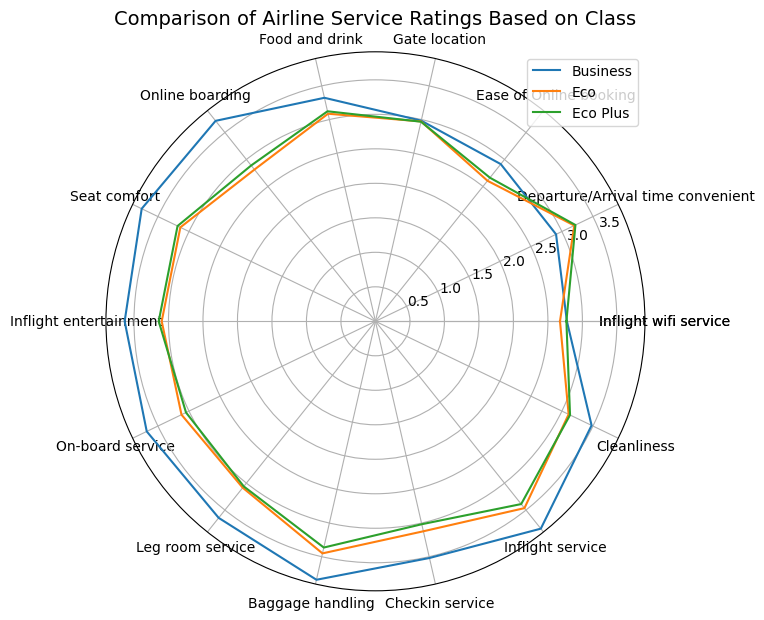

In [87]:
categories = ['Inflight wifi service','Departure/Arrival time convenient','Ease of Online booking','Gate location','Food and drink','Online boarding','Seat comfort','Inflight entertainment','On-board service','Leg room service','Baggage handling','Checkin service','Inflight service','Cleanliness']
categories = [*categories, categories[0]]

# Mean
business = survei_class.loc['Business'].values
eco = survei_class.loc['Eco'].values
ecoplus = survei_class.loc['Eco Plus'].values

business= [*business,business[0]]
eco  = [*eco,eco[0]]
ecoplus  = [*ecoplus,ecoplus[0]]

label_loc = np.linspace(start=0, stop=2 * np.pi, num=len(business))

plt.figure(figsize=(7, 7))
plt.subplot(polar=True)
plt.plot(label_loc, business, label='Business')
plt.plot(label_loc, eco, label='Eco')
plt.plot(label_loc, ecoplus, label='Eco Plus')
plt.title('Comparison of Airline Service Ratings Based on Class', size=14)
lines, labels = plt.thetagrids(np.degrees(label_loc), labels=categories)
plt.legend(loc=1)
plt.show()

* Passengers in Class Business are more satisfied with all aspects of service compared to passengers in Class Economy, except for the convenience of arrival and departure times. This is because passengers in Class Business receive more premium facilities offered by the Business Class.
* Passengers in Class Business are generally satisfied with all aspects of service; however, areas that could still be improved include food and drink, gate location, ease of online booking, convenience of arrival and departure times, and inflight wifi service. The mean satisfaction score for the convenience of arrival and departure times in Class Business is even lower than that in Class Economy and Economy Plus, indicating that delays have a greater impact on Business Class passengers, who predominantly travel for work purposes.
* Passengers in Class Economy and Class Economy Plus have similar satisfaction levels, with both groups identifying online boarding, inflight wifi service, gate location, and ease of online booking as areas that could be improved.

### 4. Based on Passenger Age

Text(0.5, 1.0, 'Median of Age Based On Passenger Satisfaction')

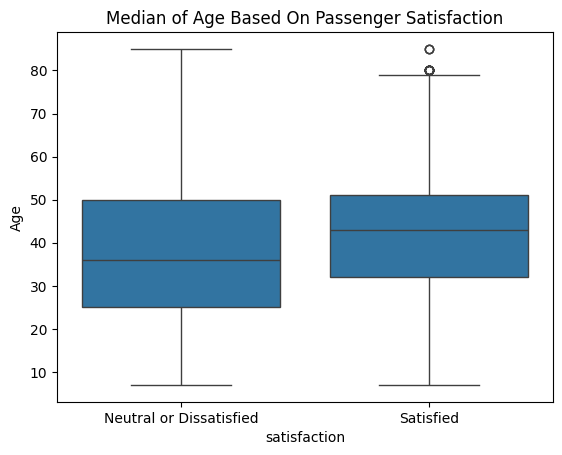

In [88]:
sns.boxplot(data=df,y='Age',x='satisfaction').set_title('Median of Age Based On Passenger Satisfaction')

In [89]:
df.groupby('satisfaction')['Age'].median()

satisfaction
Neutral or Dissatisfied    36.0
Satisfied                  43.0
Name: Age, dtype: float64

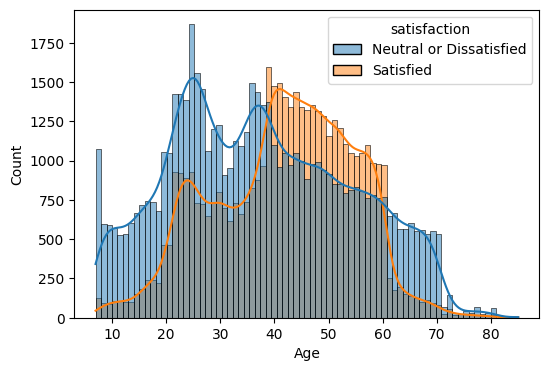

In [90]:
plt.figure(figsize=(6,4))
sns.histplot(data=df,x='Age',hue='satisfaction',kde=True)

plt.show()

Based on the distribution of passenger age for those who are satisfied or neutral/dissatisfied, it can be seen that younger passengers are more likely to feel neutral or dissatisfied compared to older passengers. Around the age range of 40 to 60 years, passengers tend to be more satisfied with the airline's service.

Now, we will statistically test whether the median age of passengers who feel neutral or dissatisfied is indeed lower than the median age of passengers who feel satisfied.

H0: The median age of passengers who feel neutral or dissatisfied is equal to the median age of passengers who feel satisfied.  
H1: The median age of passengers who feel neutral or dissatisfied is lower than the median age of passengers who feel satisfied.

In [91]:
# Using Mann Whitney U, which is a non-parametric test to compare the median of two independent populations
from scipy.stats import mannwhitneyu

result = mannwhitneyu(df[df['satisfaction'] == 'Neutral or Dissatisfied']['Age'],
                      df[df['satisfaction'] == 'Satisfied']['Age'], 
                      alternative='less')
statistic = result.statistic.item()
p_value = result.pvalue.item()
print(f"Statistic: {statistic}, P-value: {p_value}")


Statistic: 1098310812.5, P-value: 0.0


In [92]:
# Using Mann Whitney U, which is a non-parametric test to compare the median of two independent populations
from scipy.stats import mannwhitneyu

result = mannwhitneyu(df[df['satisfaction'] == 'Neutral or Dissatisfied']['Age'],
                      df[df['satisfaction'] == 'Satisfied']['Age'], 
                      alternative='less')
statistic = result.statistic.item()
p_value = result.pvalue.item()
print(f"Statistic: {statistic}, P-value: {p_value}")

Statistic: 1098310812.5, P-value: 0.0


Since the p-value is less than 0.05, we have enough evidence to reject H0, and the median age of passengers who feel neutral or dissatisfied is lower than the median age of passengers who feel satisfied.

To analyze further, we will divide passengers into several age groups according to Bappenas as follows:
* Under 15 years: Children age group
* 15-24 years: Young adults age group
* 25-34 years: Early working age group
* 35-44 years: Middle-aged group
* 45-54 years: Pre-retirement age group
* 55-64 years: Retirement age group
* 65 years and above: Elderly age group

In [93]:
age=pd.cut(df['Age'], [0, 15, 24, 34, 44, 54, 64, 85])
age.value_counts()

Age
(34, 44]    24132
(44, 54]    21422
(24, 34]    19723
(54, 64]    14064
(15, 24]    13767
(0, 15]      6048
(64, 85]     4748
Name: count, dtype: int64

In [94]:
df2=df.copy()

In [95]:
# Membuat kolom baru Age Group
df2.loc[df2['Age']<15, 'Age Group'] = 'Children'
df2.loc[df2['Age'].between(15,24), 'Age Group'] = 'Young Age'
df2.loc[df2['Age'].between(25,34), 'Age Group'] = 'Early Working Age'
df2.loc[df2['Age'].between(34,44), 'Age Group'] = 'Middle Aged'
df2.loc[df2['Age'].between(45,54), 'Age Group'] = 'Pre Retirement Age'
df2.loc[df2['Age'].between(55,64), 'Age Group'] = 'Retirement Age'
df2.loc[df2['Age']>64, 'Age Group'] = 'Elderly'

In [96]:
df2['Age Group'].value_counts()

Age Group
Middle Aged           25885
Pre Retirement Age    21422
Early Working Age     17970
Young Age             14585
Retirement Age        14064
Children               5230
Elderly                4748
Name: count, dtype: int64

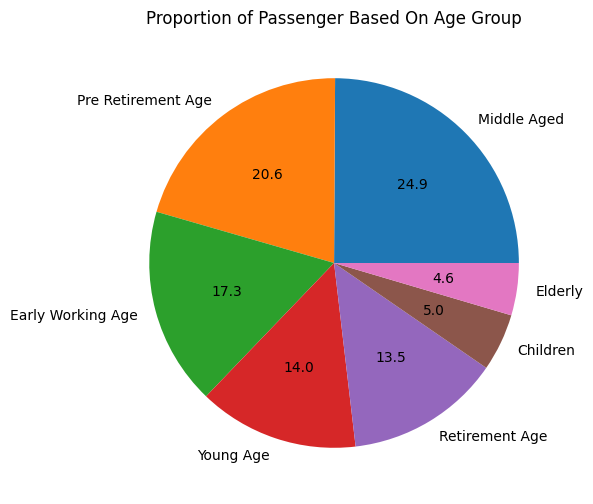

In [97]:
vc=df2['Age Group'].value_counts()
plt.figure(figsize=(6,6))
plt.pie(vc,labels=vc.index,
    autopct='%.1f')
plt.title('Proportion of Passenger Based On Age Group')
plt.show()

It can be concluded that the largest market for the airline based on age groups consists of middle-aged, pre-retirement, early working age, young adults, and retirement age groups, while children and elderly passengers have a small proportion in the airline's passenger market. Therefore, we will conduct an analysis to identify the factors affecting passenger satisfaction based on their age group.

In [98]:
pd.crosstab(df2['Age Group'],df2['satisfaction'],normalize='index')

satisfaction,Neutral or Dissatisfied,Satisfied
Age Group,,
Children,0.861377,0.138623
Early Working Age,0.632165,0.367835
Elderly,0.815712,0.184288
Middle Aged,0.504848,0.495152
Pre Retirement Age,0.421062,0.578938
Retirement Age,0.509315,0.490685
Young Age,0.678094,0.321906


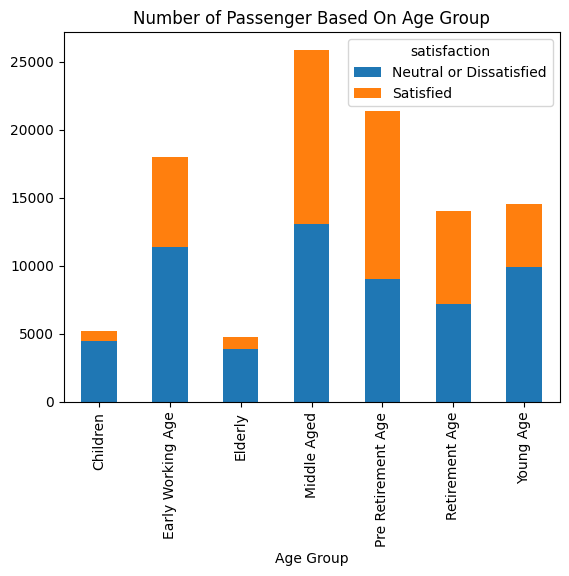

In [99]:
df_plot=df2.groupby(['Age Group','satisfaction']).size().reset_index().pivot(columns='satisfaction', index='Age Group', values=0)
   
df_plot.plot(kind='bar', stacked=True)

plt.title('Number of Passenger Based On Age Group')
plt.show()

Based on the barplot, only the pre-retirement age group, retirement age group, and middle-aged group mostly feel satisfied, while other age groups predominantly feel neutral or dissatisfied with the airline's service. It is observed that the young adult group and early working age group mostly feel neutral or dissatisfied (67.8% of young adults and 63.2% of early working adults feel neutral or dissatisfied), so we will further analyze the factors that cause these two age groups to feel neutral or dissatisfied.

In [100]:
survei_agegroup=df2.groupby('Age Group')[['Inflight wifi service','Departure/Arrival time convenient','Ease of Online booking','Gate location','Food and drink','Online boarding','Seat comfort','Inflight entertainment','On-board service','Leg room service','Baggage handling','Checkin service','Inflight service','Cleanliness']].mean()
survei_agegroup

,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness
Age Group,,,,,,,,,,,,,,
Children,2.552008,3.397132,2.560994,2.945889,2.990249,2.568834,2.953346,3.018164,3.224283,3.204207,3.666539,3.204589,3.691778,3.005736
Early Working Age,2.667446,2.951363,2.715136,2.987201,3.251252,2.959599,3.236283,3.262771,3.240234,3.221035,3.653200,3.227379,3.676516,3.263996
Elderly,2.570556,3.357624,2.639217,2.933235,3.092460,3.145535,3.351516,3.078770,3.111626,2.942291,3.277591,3.136268,3.304760,3.088037
Middle Aged,2.787831,3.018505,2.795905,2.986517,3.206181,3.347344,3.519413,3.440139,3.453583,3.453467,3.644350,3.319297,3.649063,3.313038
Pre Retirement Age,2.799552,3.099944,2.830268,2.992718,3.266595,3.649706,3.740360,3.564420,3.562226,3.525394,3.660769,3.424657,3.665624,3.429652
Retirement Age,2.726607,3.159059,2.768842,2.961035,3.216226,3.553541,3.666880,3.448023,3.465301,3.413183,3.581271,3.365472,3.580418,3.356371
Young Age,2.719026,2.897635,2.728420,2.964415,3.137813,2.836202,3.089133,3.153445,3.231745,3.199246,3.692424,3.227083,3.692355,3.153720


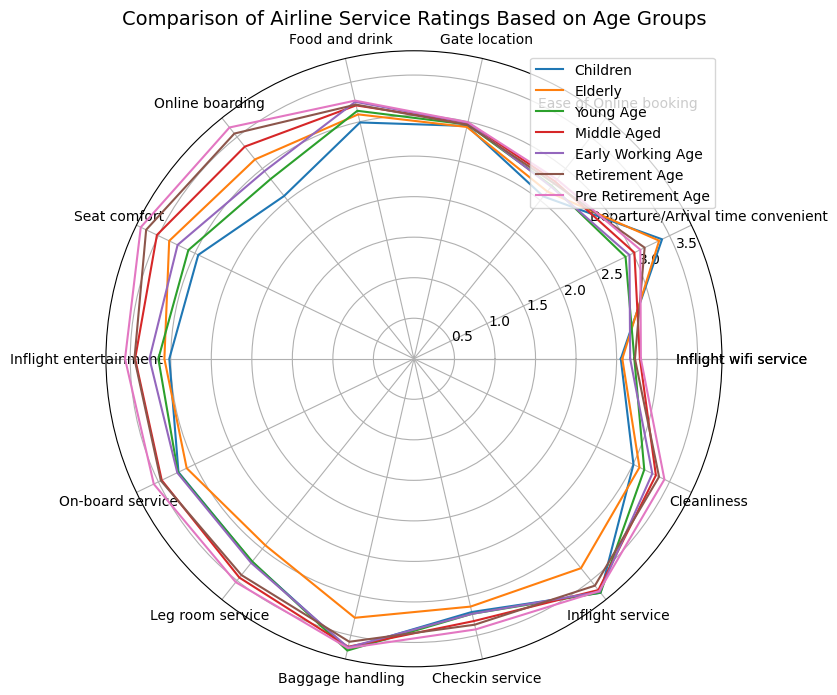

In [101]:
categories = ['Inflight wifi service','Departure/Arrival time convenient','Ease of Online booking','Gate location','Food and drink','Online boarding','Seat comfort','Inflight entertainment','On-board service','Leg room service','Baggage handling','Checkin service','Inflight service','Cleanliness']
categories = [*categories, categories[0]]

# Mean
children = survei_agegroup.loc['Children'].values
elderly = survei_agegroup.loc['Elderly'].values
young = survei_agegroup.loc['Young Age'].values
middle = survei_agegroup.loc['Middle Aged'].values
earlyworking = survei_agegroup.loc['Early Working Age'].values
retirement = survei_agegroup.loc['Retirement Age'].values
preretirement = survei_agegroup.loc['Pre Retirement Age'].values

children=[*children,children[0]]
elderly=[*elderly,elderly[0]]
young=[*young,young[0]]
middle=[*middle,middle[0]]
earlyworking=[*earlyworking,earlyworking[0]]
retirement=[*retirement,retirement[0]]
preretirement=[*preretirement,preretirement[0]]

label_loc = np.linspace(start=0, stop=2 * np.pi, num=len(children))

plt.figure(figsize=(8, 8))
plt.subplot(polar=True)
plt.plot(label_loc, children, label='Children')
plt.plot(label_loc, elderly, label='Elderly')
plt.plot(label_loc, young, label='Young Age')
plt.plot(label_loc, middle, label='Middle Aged')
plt.plot(label_loc, earlyworking, label='Early Working Age')
plt.plot(label_loc, retirement, label='Retirement Age')
plt.plot(label_loc, preretirement, label='Pre Retirement Age')
plt.title('Comparison of Airline Service Ratings Based on Age Groups', size=14)
lines, labels = plt.thetagrids(np.degrees(label_loc), labels=categories)
plt.legend(loc=1)
plt.show()

* Overall, the aspects that are still considered lacking by all age groups are the wifi service on the plane, gate locations, and the ease of online booking.
* Aspects that are considered sufficient but still can be improved by all age groups are food and beverages, as well as the comfort of arrival and departure times (especially for working-age passengers).
* The aspect that most affects the younger age group to feel neutral or dissatisfied with overall satisfaction is the comfort of departure and arrival times, while the aspect that most affects early working-age groups to feel neutral or dissatisfied with overall satisfaction is the wifi service on the plane. It can be concluded that for the younger age group and early working-age individuals, who are teenagers or young adults, punctuality and wifi service on the plane are very important for their needs (related to education or work-related purposes).



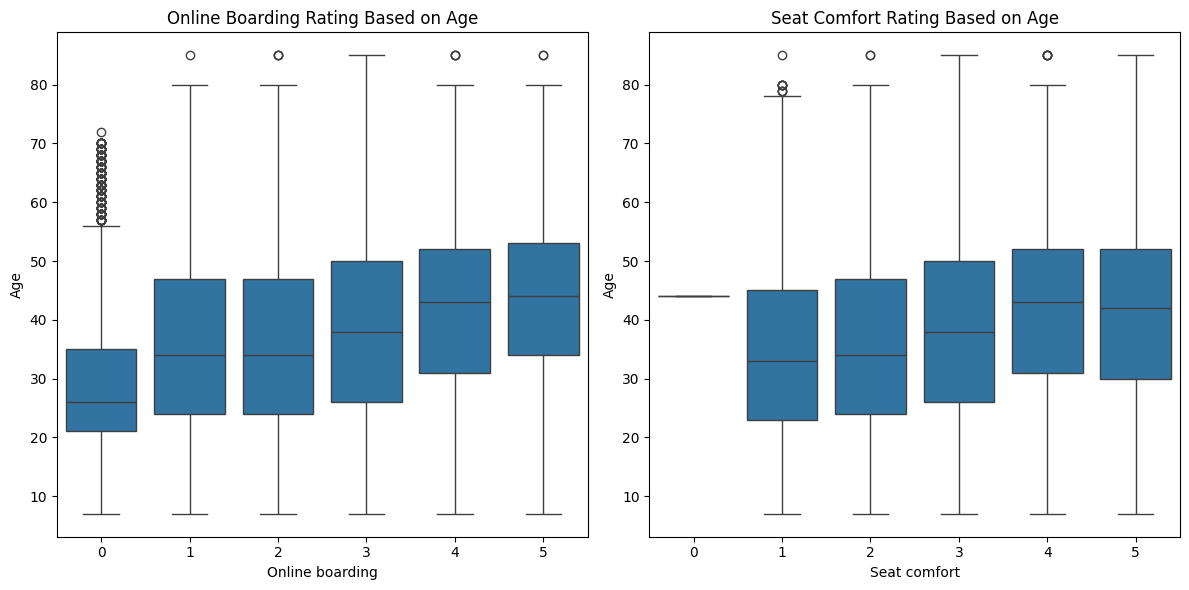

In [102]:
figure,axis=plt.subplots(1,2,figsize=(12,6))

sns.boxplot(data=df,y='Age',x='Online boarding',ax=axis[0]).set_title('Online Boarding Rating Based on Age')
sns.boxplot(data=df,y='Age',x='Seat comfort',ax=axis[1]).set_title('Seat Comfort Rating Based on Age')

plt.tight_layout()
plt.show()

In addition, older passengers tend to give higher ratings for online boarding and seat comfort. It can be concluded that it is important for airlines to ensure the ease of online boarding and seat comfort, especially for older passengers.

### 5. Based on Flight Distance

Text(0.5, 1.0, 'Median of Flight Distance Based On Passenger Satisfaction')

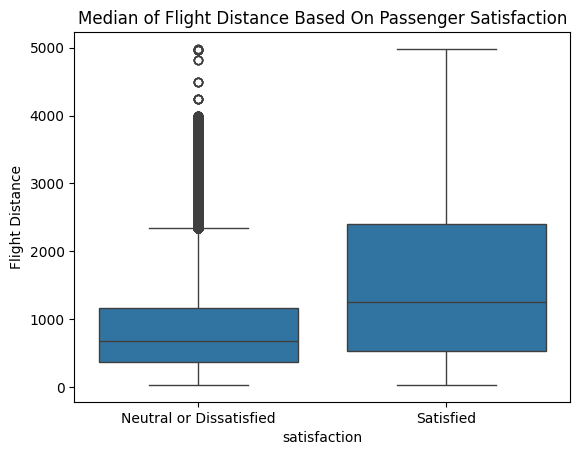

In [103]:
sns.boxplot(data=df,y='Flight Distance',x='satisfaction').set_title('Median of Flight Distance Based On Passenger Satisfaction')

In [104]:
df.groupby('satisfaction')['Flight Distance'].median()

satisfaction
Neutral or Dissatisfied     671.0
Satisfied                  1250.0
Name: Flight Distance, dtype: float64

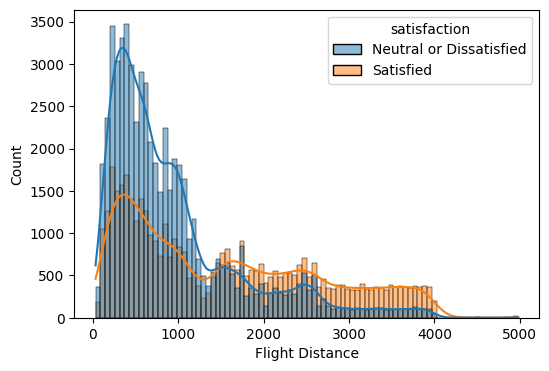

In [105]:
plt.figure(figsize=(6,4))
sns.histplot(data=df,x='Flight Distance',hue='satisfaction',kde=True)

plt.show()

Based on the distribution of travel distances for passengers who are satisfied, neutral, or dissatisfied, it appears that passengers traveling shorter distances are more likely to feel neutral or dissatisfied compared to those traveling longer distances. According to the travel distance distribution plot, passengers traveling more than approximately 1400 miles tend to feel more satisfied compared to those traveling less than approximately 1400 miles.

Now, we will statistically test whether the median travel distance of passengers who feel neutral or dissatisfied is indeed lower compared to the median travel distance of passengers who feel satisfied.

H0: The median travel distance of passengers who feel neutral or dissatisfied is equal to the median travel distance of passengers who feel satisfied.  
H1: The median travel distance of passengers who feel neutral or dissatisfied is lower than the median travel distance of passengers who feel satisfied.

In [108]:
# Using the Mann-Whitney U test, which is a non-parametric test to compare the medians of two independent populations
from scipy.stats import mannwhitneyu

stat, p_value = mannwhitneyu(df[df['satisfaction']=='Neutral or Dissatisfied']['Flight Distance'],
                             df[df['satisfaction']=='Satisfied']['Flight Distance'], alternative='less')
print(f"Test Statistic: {stat},P-value: {p_value}")


Test Statistic: 928190637.5,P-value: 0.0


In [109]:
# Using the Mann-Whitney U test, which is a non-parametric test to compare the medians of two independent populations
from scipy.stats import mannwhitneyu

stat, p_value = mannwhitneyu(
    df[df['satisfaction'] == 'Neutral or Dissatisfied']['Flight Distance'],
    df[df['satisfaction'] == 'Satisfied']['Flight Distance'],
    alternative='less')
print(f"Test Statistic: {stat}, P-value: {p_value}")


Test Statistic: 928190637.5, P-value: 0.0


In [110]:
# Using the Mann-Whitney U test, which is a non-parametric test to compare the medians of two independent populations
from scipy.stats import mannwhitneyu
stat, p_value = mannwhitneyu(
    df[df['satisfaction'] == 'Neutral or Dissatisfied']['Flight Distance'],
    df[df['satisfaction'] == 'Satisfied']['Flight Distance'],
    alternative='less')
print(f"Test Statistic: {stat}, P-value: {p_value}")

Test Statistic: 928190637.5, P-value: 0.0


Since the p-value is smaller than 0.05, we have sufficient evidence to reject H0, and the median travel distance of passengers who feel neutral or dissatisfied is lower compared to the median travel distance of passengers who feel satisfied.

Based on the travel distance distribution plot, passengers traveling more than 1400 miles tend to feel more satisfied compared to passengers traveling less than 1400 miles. To analyze further, we will divide the travel distance into two categories: short distance for passengers traveling less than 1400 miles, and long distance for passengers traveling more than 1400 miles.

In [111]:
df3=df.copy()

In [112]:
# Creating a new column called Distance Group
df3.loc[df3['Flight Distance']<=1400, 'Distance Group'] = 'Short Distance'
df3.loc[df2['Flight Distance']>1400, 'Distance Group'] = 'Long Distance'


In [113]:
# The count of distance groups and passenger classes.
pd.crosstab(df3['Distance Group'],df3['Class'])

Class,Business,Eco,Eco Plus
Distance Group,,,
Long Distance,27381,5152,918
Short Distance,22284,41593,6576


In [114]:
df_piechart2 = pd.DataFrame([['Short Distance','Business', 22284],
                   ['Short Distance','Eco', 41593],
                   ['Short Distance','Eco Plus', 6576],
                   ['Long Distance','Business', 27381],
                   ['Long Distance','Eco', 5152],
                   ['Long Distance','Eco Plus', 918]])
df_piechart2.columns = ['Distance Group','Class', 'n']

In [115]:
outer2 = df_piechart2.groupby('Distance Group').sum()

inner2 = df_piechart2.groupby(['Distance Group', 'Class']).sum()

inner_labels2 = inner2.index.get_level_values(1)
inner2

n
Distance Group Class          
Long Distance  Business  27381
               Eco        5152
               Eco Plus    918
Short Distance Business  22284
               Eco       41593
               Eco Plus   6576

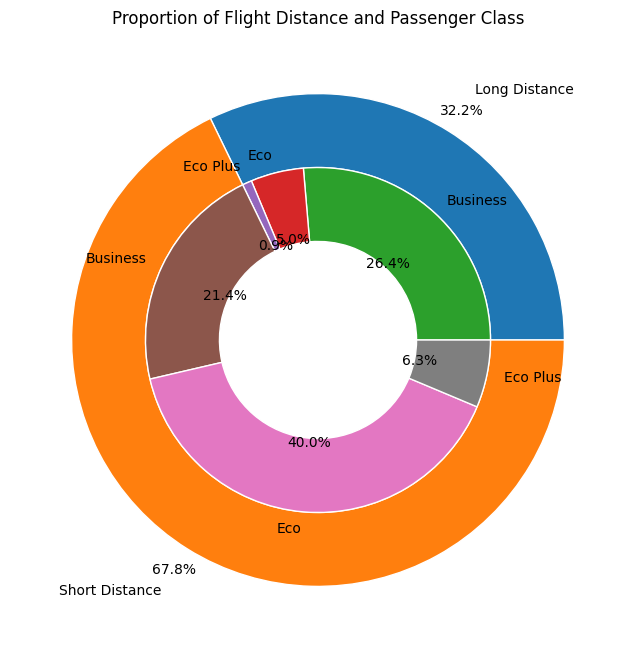

In [119]:
fig, ax = plt.subplots(figsize=(12,8))
size = 0.3

# Plot the outer pie chart (for Distance Groups)
ax.pie(outer2['n'], radius=1,
       labels=outer2.index,
       autopct='%1.1f%%',
       pctdistance=1.1, labeldistance=1.2,
       wedgeprops=dict(width=size, edgecolor='w'))

# Plot the inner pie chart (for Classes within each Distance Group)
ax.pie(inner2['n'], radius=1-size, 
       labels=inner_labels2,
       autopct='%1.1f%%',
       wedgeprops=dict(width=size, edgecolor='w'))

ax.set(aspect="equal", title='Proportion of Flight Distance and Passenger Class')
plt.show()

* Passengers traveling over 1400 miles, or categorized as long-distance travelers, tend to prefer using Business Class. It can be concluded that passengers choose Business Class to receive better service and comfort, especially for longer journeys.  
* 68% of the flights operated by the airline are short-distance journeys. The majority of passengers traveling under 1400 miles, or categorized as short-distance travelers, are in Economy Class.

In [120]:
df_plot_long=df3[df3['Distance Group']=='Long Distance'].groupby(['satisfaction','Class']).size().reset_index().pivot(columns='satisfaction', index='Class', values=0)
df_plot_short=df3[df3['Distance Group']=='Short Distance'].groupby(['satisfaction','Class']).size().reset_index().pivot(columns='satisfaction', index='Class', values=0)


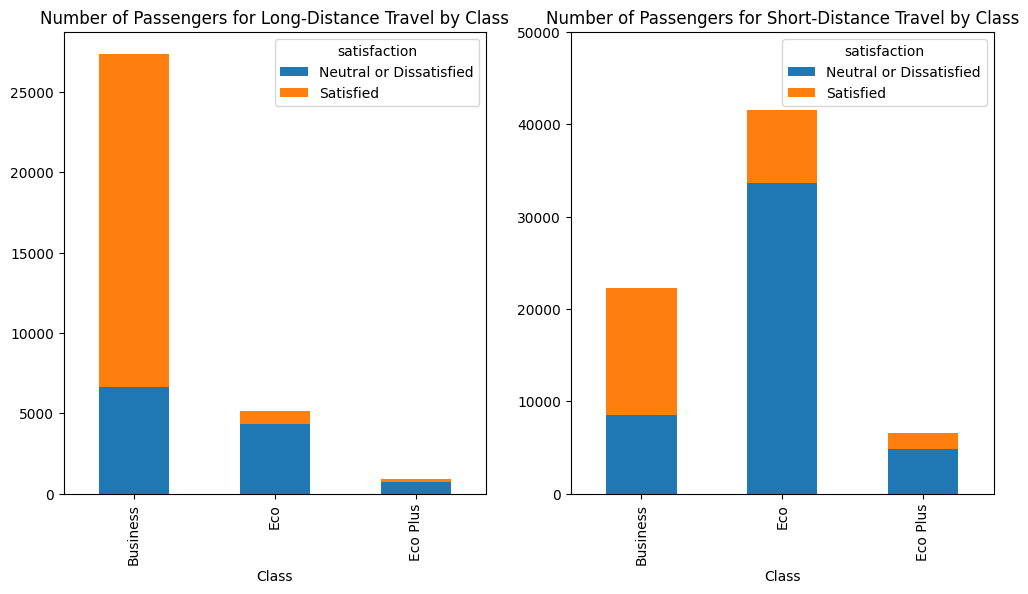

In [121]:
figure,axis=plt.subplots(1,2,figsize=(12,6))

df_plot_long.plot(kind='bar',stacked=True,ax=axis[0]).set_title('Number of Passengers for Long-Distance Travel by Class')
df_plot_short.plot(kind='bar',stacked=True,ax=axis[1]).set_title('Number of Passengers for Short-Distance Travel by Class')

plt.ylim(0, 50000)
plt.show()

It appears that the number of short-distance passengers who feel neutral or dissatisfied with the airline's service in Economy Class is very high. Therefore, it can be concluded that the class factor, specifically Economy Class, which is often the choice for passengers traveling only short distances, is a contributing factor to the high level of dissatisfaction among passengers with short-distance journeys.

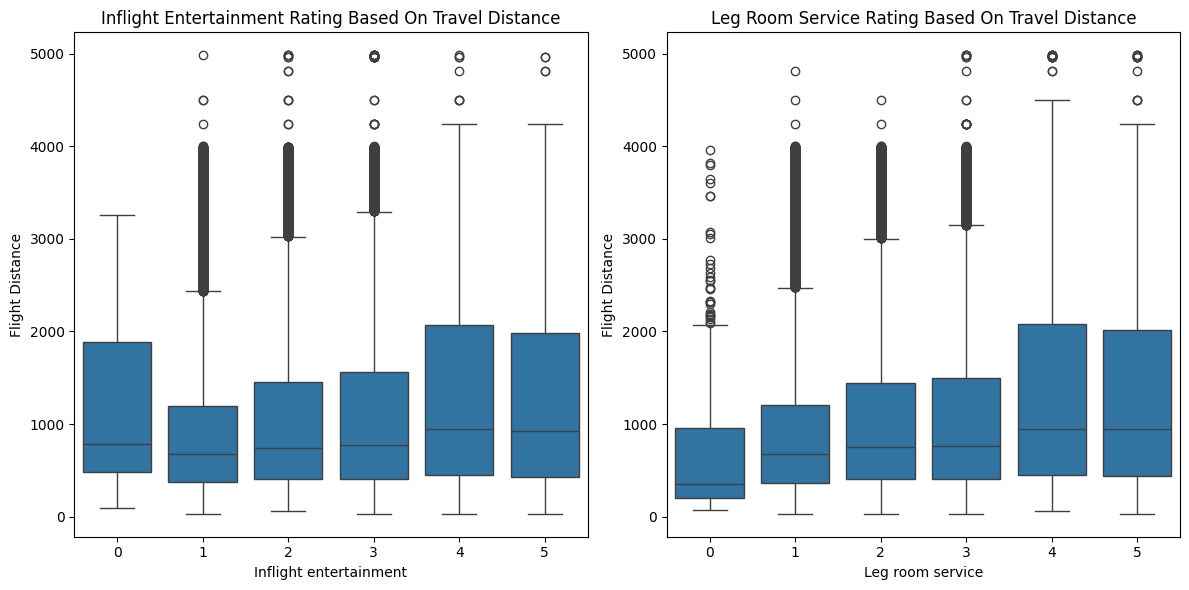

In [122]:
figure,axis=plt.subplots(1,2,figsize=(12,6))

sns.boxplot(data=df,y='Flight Distance',x='Inflight entertainment',ax=axis[0]).set_title('Inflight Entertainment Rating Based On Travel Distance')
sns.boxplot(data=df,y='Flight Distance',x='Leg room service',ax=axis[1]).set_title('Leg Room Service Rating Based On Travel Distance')

plt.tight_layout()
plt.show()

Additionally, passengers with longer travel distances tend to give higher ratings for inflight entertainment and seat space. Therefore, it can be concluded that it is important for airlines to provide adequate inflight entertainment and seat space, especially for long-distance flights.

### 6. Based on Departure Delay in Minutes and Arrival Delay in Minutes


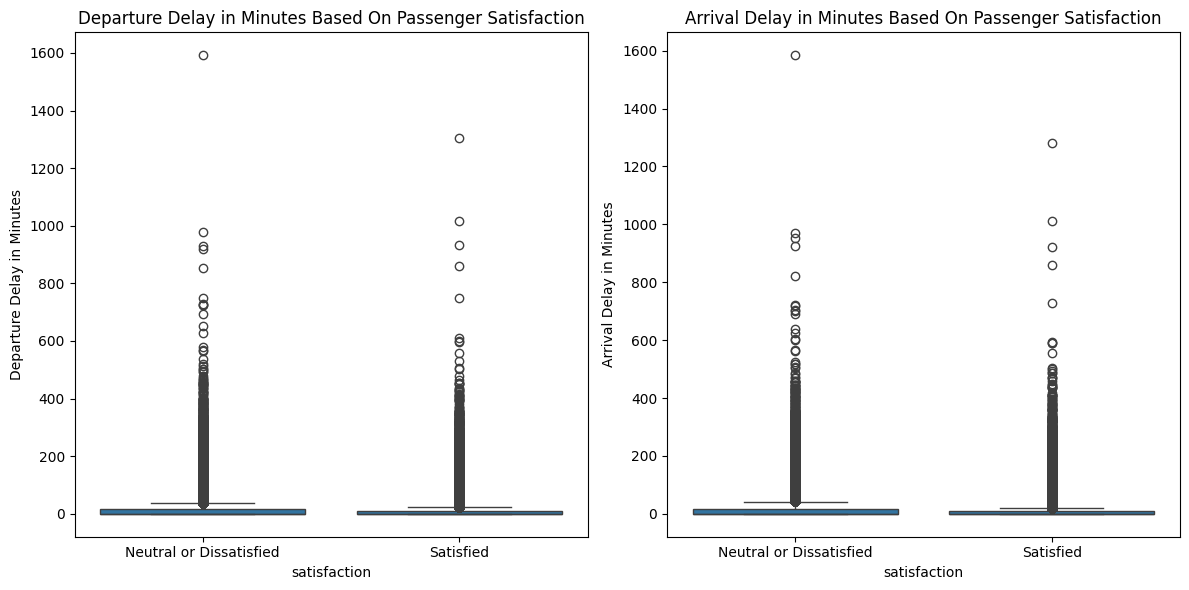

In [123]:
figure,axis=plt.subplots(1,2,figsize=(12,6))

sns.boxplot(data=df,y='Departure Delay in Minutes',x='satisfaction',ax=axis[0]).set_title('Departure Delay in Minutes Based On Passenger Satisfaction')
sns.boxplot(data=df,y='Arrival Delay in Minutes',x='satisfaction',ax=axis[1]).set_title('Arrival Delay in Minutes Based On Passenger Satisfaction')

plt.tight_layout()
plt.show()

In [125]:
df.groupby('satisfaction')['Departure Delay in Minutes'].median()

satisfaction
Neutral or Dissatisfied    0.0
Satisfied                  0.0
Name: Departure Delay in Minutes, dtype: float64

In [126]:
df.groupby('satisfaction')['Arrival Delay in Minutes'].median()

satisfaction
Neutral or Dissatisfied    0.0
Satisfied                  0.0
Name: Arrival Delay in Minutes, dtype: float64

Based on the boxplot above, the median duration of departure or arrival delays for passengers who feel neutral or dissatisfied does not show a significant difference compared to the median duration of departure or arrival delays for passengers who feel satisfied.

Now, we will statistically test whether the median duration of departure delays for passengers who feel neutral or dissatisfied is approximately the same as the median duration of departure delays for passengers who feel satisfied.

H0: The median duration of departure delays for passengers who feel neutral or dissatisfied is equal to the median duration of departure delays for passengers who feel satisfied.  
H1: The median duration of departure delays for passengers who feel neutral or dissatisfied is lower than the median duration of departure delays for passengers who feel satisfied.

In [127]:
# Using the Mann-Whitney U test, which is a non-parametric test to compare the medians of two independent populations
from scipy.stats import mannwhitneyu

stat, p_value=mannwhitneyu(df[df['satisfaction']=='Neutral or Dissatisfied']['Departure Delay in Minutes'],
df[df['satisfaction']=='Satisfied']['Departure Delay in Minutes'],alternative='less')
print(f"Statistic: {stat}, p-value: {p_value}")

Statistic: 1420483950.0, p-value: 1.0


In [128]:
# Using the Mann-Whitney U test, which is a non-parametric test to compare the medians of two independent populations
from scipy.stats import mannwhitneyu

stat, p_value=mannwhitneyu(df[df['satisfaction']=='Neutral or Dissatisfied']['Arrival Delay in Minutes'],
df[df['satisfaction']=='Satisfied']['Arrival Delay in Minutes'],alternative='less')
print(f"Statistic: {stat}, p-value: {p_value}")

Statistic: 1465830841.5, p-value: 1.0


Since both p-values are greater than 0.05, we do not have sufficient evidence to reject H0, and the median duration of departure and arrival delays for passengers who feel neutral or dissatisfied is not lower or approximately the same as the median duration of departure and arrival delays for passengers who feel satisfied.

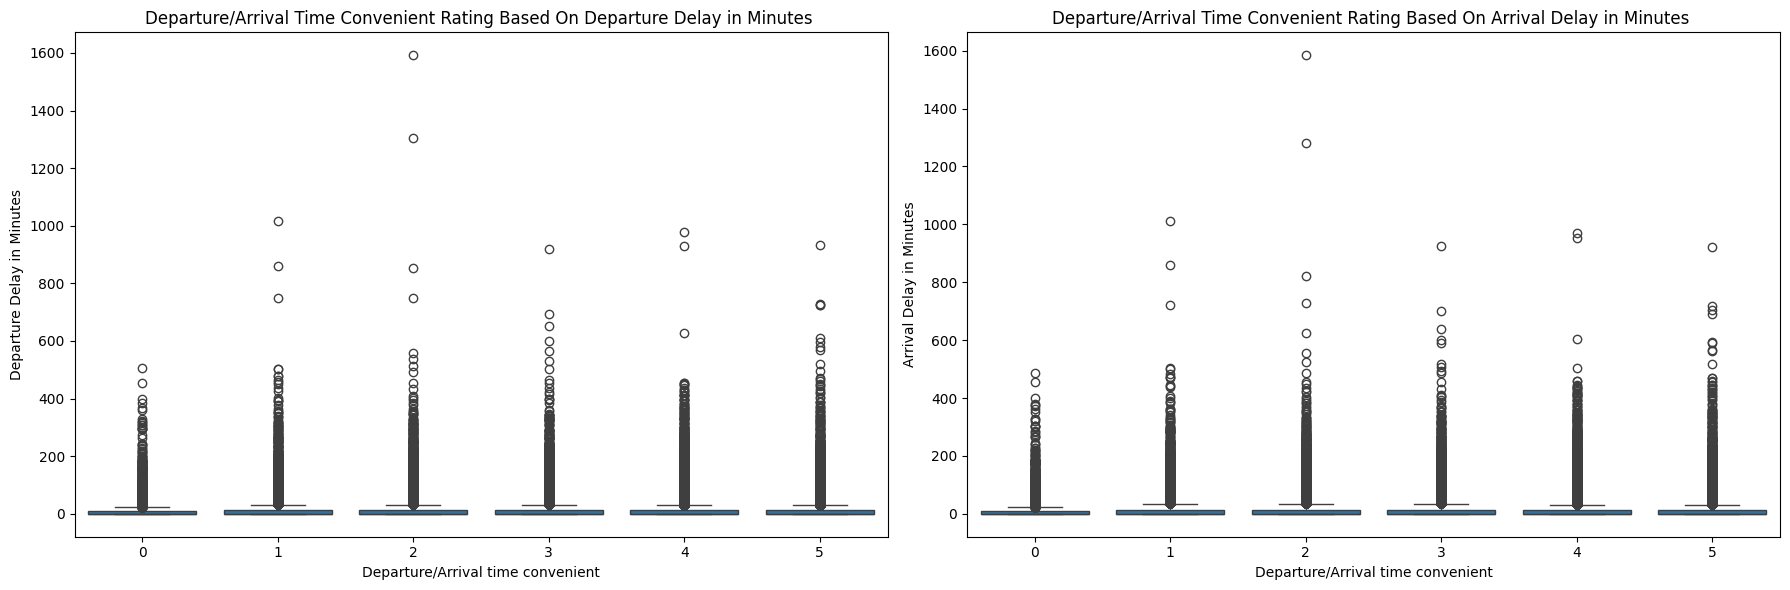

In [14]:
figure,axis=plt.subplots(1,2,figsize=(18,6))

sns.boxplot(data=df,y='Departure Delay in Minutes',x='Departure/Arrival time convenient',ax=axis[0]).set_title('Departure/Arrival Time Convenient Rating Based On Departure Delay in Minutes ')
sns.boxplot(data=df,y='Arrival Delay in Minutes',x='Departure/Arrival time convenient',ax=axis[1]).set_title('Departure/Arrival Time Convenient Rating Based On Arrival Delay in Minutes ')

plt.tight_layout()
plt.show()

There is no difference in the ratings given by passengers based on the duration of departure and arrival delays. Therefore, it can be concluded that the duration of departure and arrival delays does not affect the assessment of departure and arrival time comfort, nor does it influence passenger satisfaction with the airline's service.

# Conclusion

The answers to the research questions are as follows:

1. **Do passengers feel satisfied or dissatisfied with the airline's service?**

Overall, the majority of passengers (56.7%) feel neutral or dissatisfied with the airline's service, making it important to identify the factors that affect passenger satisfaction related to airline services.

2. **What factors can influence passenger satisfaction regarding airline services?**

**Based on Gender**  
- The gender of the passenger does not significantly affect their satisfaction with the airline's service.

**Based on Type of Travel and Class**
- Passengers who travel for business prefer Business Class, while passengers traveling for personal reasons prefer Economy Class and Eco Plus.
- Class and type of travel affect passenger satisfaction with airline services, with Economy Class, commonly chosen by passengers on personal travel, being a factor contributing to high dissatisfaction among passengers.
- Passengers in Business Class are more satisfied with all service aspects compared to Economy Class passengers, except for the comfort of arrival and departure times, as Business Class passengers receive more premium facilities.
- The comfort of arrival and departure times has a greater impact on Business Class passengers, who are mostly traveling for work, compared to passengers traveling for personal reasons.

Aspects of service that can still be improved:
- **For Business Class passengers:** Wi-Fi service on the plane, gate location, ease of online booking, comfort of arrival and departure times, food and beverages.
- **For Economy Class and Economy Plus passengers:** Wi-Fi service on the plane, gate location, ease of online booking, and ease of online boarding.

**Based on Passenger Age**
- Younger passengers tend to be more likely to feel neutral or dissatisfied with the airline's service.
- The younger age group and early working-age group are the categories most likely to feel neutral or dissatisfied with the overall airline service.
- Older passengers tend to give higher ratings for online boarding and seat comfort, making it important for airlines to ensure easy online boarding and seat comfort, especially for older passengers.

Aspects that are still considered lacking by all age groups: Wi-Fi service on the plane, gate location, and ease of online booking.

Aspects that are considered sufficient but can still be improved by all age groups include food and beverages and the comfort of arrival and departure times (especially for working-age passengers).

**Based on Flight Distance**
- Passengers traveling over 1500 miles prefer Business Class, while passengers traveling under 1500 miles are more likely to choose Economy Class (and tend to feel neutral or dissatisfied).
- The Class factor, specifically Economy Class, contributes to the high dissatisfaction level among passengers on short-distance flights.
- Passengers with longer travel distances tend to give higher ratings for inflight entertainment and seat space.

**Based on Delay Duration**
- The duration of departure and arrival delays does not affect customer satisfaction with the airline's service.

**Therefore, the overall aspects of service that can still be improved are:**
- Inflight Wi-Fi service
- Ease of online booking and online boarding
- Gate location
- Comfort of arrival and departure times
- Food and beverages

## Recommendation to the Airline

The recommendations provided to the airline to improve service aspects are as follows:

1. Improve the availability and speed of Wi-Fi service on the plane for both Business Class and Economy Class, as well as Economy Plus passengers.
2. Adjust the gate locations to align with the aircraft position so passengers do not have to walk too far during boarding.
3. Develop the app with features that are easier to understand and more stable to facilitate online booking and online boarding, especially for Economy and Economy Plus passengers.
4. Ensure timely arrival and departure schedules, as the comfort of arrival and departure times is crucial, especially for working-age passengers.
5. Develop a more varied and appealing food and beverage menu, especially for Business Class passengers.
6. Provide adequate inflight entertainment and seat space, particularly for long-distance flights.
7. Use the service provided to Business Class passengers as a benchmark for service in Economy and Economy Plus, as the majority of Economy and Economy Plus passengers are far more dissatisfied than Business Class passengers.
8. Develop services and marketing strategies that specifically focus on Economy Class passengers traveling for business, in order to convert disloyal customers into loyal customers.


By improving the service aspects that passengers feel still need enhancement based on the survey results, this analysis is expected to improve the customer experience, leading to an increase in airline passengers in the future.